## Problem statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

We are required to model the price of houses with the available independent variables. Also, determine the optimal value of lambda for ridge and lasso regression.

## Import all the libraries 

In [1]:
# first import numpy and panda
import numpy as np
import pandas as pd


# import library to plot graphs
import matplotlib.pyplot as plt
import seaborn as sns


# import library to build model
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# import library for Gridsearch and evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

##  Step 1. Data Understanding and Exploration¶

Let's first have a look at the dataset and understand the size, attribute names etc.

In [2]:
# read the data and save in housing (hsg) dataframe

hsg = pd.read_csv("train.csv")

In [3]:
# shape of dataset

hsg.shape

(1460, 81)

In [4]:
# let's check 10 sample data

hsg.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1202,1203,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,117000
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
259,260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
917,918,20,RL,NaN,17140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,135000
1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,394617
616,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200
1079,1080,20,RL,65.0,8775,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,126000
1289,1290,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,281000
656,657,20,RL,72.0,10007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2008,WD,Normal,145500


In [5]:
# details of numeric variables

hsg.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# info about the columns

hsg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Step 2. Understanding data dictonary and finding missing value

- calculate the percentage of null values in each column
- create a dataframe that stores the count and percentage of missing value in each column
- plot the percentage value
- refer the data dictonary and decide about missing values

In [7]:
# calculate the missing count and percentage and create a dataframe (miss_df)

miss_count = hsg.isnull().sum()
miss_percentage = round(miss_count/len(hsg.index)*100,2)

miss_df = pd.DataFrame({'count': miss_count, 'percentage':miss_percentage})
print(miss_df)

               count  percentage
Id                 0        0.00
MSSubClass         0        0.00
MSZoning           0        0.00
LotFrontage      259       17.74
LotArea            0        0.00
Street             0        0.00
Alley           1369       93.77
LotShape           0        0.00
LandContour        0        0.00
Utilities          0        0.00
LotConfig          0        0.00
LandSlope          0        0.00
Neighborhood       0        0.00
Condition1         0        0.00
Condition2         0        0.00
BldgType           0        0.00
HouseStyle         0        0.00
OverallQual        0        0.00
OverallCond        0        0.00
YearBuilt          0        0.00
YearRemodAdd       0        0.00
RoofStyle          0        0.00
RoofMatl           0        0.00
Exterior1st        0        0.00
Exterior2nd        0        0.00
MasVnrType         8        0.55
MasVnrArea         8        0.55
ExterQual          0        0.00
ExterCond          0        0.00
Foundation

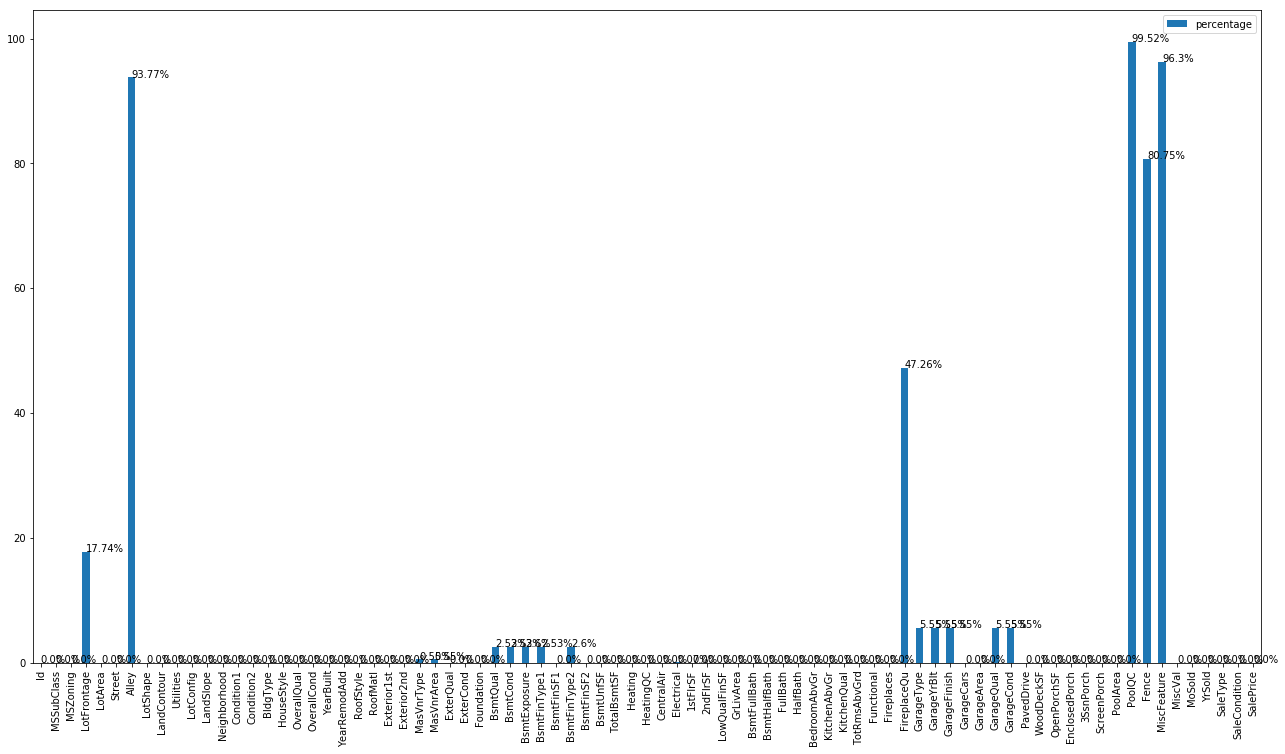

In [8]:
# create barchart for missing value

barchart = miss_df.plot.bar(y='percentage',figsize = (22,12))

for index, percentage in enumerate(miss_percentage):
    barchart.text(index, percentage, str(percentage) + '%' )
    
plt.show()

In [9]:
# select and create df having column with missing value

miss_df1 = miss_df[miss_df.percentage > 0]
miss_df1

,count,percentage
LotFrontage,259,17.74
Alley,1369,93.77
MasVnrType,8,0.55
MasVnrArea,8,0.55
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtFinType2,38,2.60
Electrical,1,0.07


### Conclusion about missing value
There are below 5 columns having many missing value:
    - PoolQC
    - Fence
    - MiscFeature
    - FireplaceQu
    - Alley - 
    
    As per data dictonary Aalley can have below values:
    - NA	No Pool (for PoolQC)
    - NA	No Fence (for Fence)
    - NA	None (For MiscFeature)
    - NA	No Fireplace (for FireplaceQu)
    - NA 	No alley access (for Alley)
#### So, null value for above columns can't be considered as missing value. Having said since these columns are having 80% NA data we can consider dropping it as it will not have much impact on final model.
       
#### Additional comment
- Id variable is of no use and can be dropped

Below variables can be considered as duplicate and 1 of them can be dropped
- OverallQual and OverallCond - Will drop OverallQual 
- Condition1 and Condition2 - Will drop Condition2
- Exterior1st and Exterior2nd - Will drop Exterior2nd
- ExterQual and ExterCond - Will drop ExterQual
- BsmtQual and BsmtCond - Will drop BsmtQual
- BsmtFinType1 and BsmtFinType2 (and BsmtFinSF2) - Will drop BsmtFinType2 and BsmtFinSF2
- GarageCars and GarageArea - will drop GarageCars
- GarageQual and GarageCond - will drop GarageQual
- BsmtFullBath and BsmtHalfBath - will drop BsmtHalfBath
- FullBath and HalfBath - will drop HalfBath

In [10]:
# drop the columns as per above conclusion

hsg = hsg.drop(['PoolQC', 'Fence', 'MiscFeature', 
                'FireplaceQu', 'Alley', 'Id', 
                'OverallQual', 'Condition2', 'Exterior2nd',
                'ExterQual', 'BsmtQual', 'BsmtFinType2', 
                'BsmtFinSF2',   'GarageCars', 'GarageQual',
                'BsmtHalfBath', 'HalfBath', 'BsmtExposure'], axis =1)

In [11]:
# shape of remaining dataset

hsg.shape

(1460, 63)

### Derived variables:
we have three date columns YrSold, YearBuilt, YearRemodAdd
- using the first two we can calculate the age of property (Propertyage new column) 
- the last two can be compare to check whether the property is remodelled or not (Remodel new column)
- Then we can drop the above three date columns

In [12]:
# Dervie new column PropertyAge by subtracting year sold and year built

hsg['PropertyAge'] = hsg['YrSold'] - hsg['YearBuilt']

In [13]:
# Dervie new column Remodel. When remodel date and built date is not same property is rebuilt

hsg['Remodel'] = np.where(hsg['YearRemodAdd'] == hsg['YearBuilt'], 1, 0)

# Change the datatype to object

hsg.Remodel = hsg.Remodel.astype('object')

In [14]:
#drop date columns as these are no longer useful. I will also take this opportunity to drop GarageYrBlt

hsg = hsg.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'],axis=1)

In [15]:
# shape of remaining dataset

hsg.shape

(1460, 61)

## Step 3. Missing and outlier value treatment 
- First check the null value in remaining columns and impute with correct value
- check and Correct the data types 
- Find out the outliers in important numeric columns, plot and remove them

In [16]:
# calculate the null percentage

round(hsg.isnull().sum()/len(hsg.index)*100,2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
BldgType          0.00
HouseStyle        0.00
OverallCond       0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterCond         0.00
Foundation        0.00
BsmtCond          2.53
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
                 ...  
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
FullBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
GarageType 

In [17]:
# LotFrontage is having maximum null value. Check the parameters of the column

hsg.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
# We will use median to impute the missing value. Save the value in val variable

val = hsg.LotFrontage.describe()[5]
val

69.0

In [19]:
# Impute the missing value with above value

hsg.LotFrontage = hsg.LotFrontage.fillna(val) 

### Comments about Garage related columns
- As per data dictonary for the 5.55% missing value shown above means `No Garage` for below columns:
    - GarageType        5.55%
    - GarageFinish      5.55%
    - GarageCond        5.55%

- I will assign value `NoGar` (No Garage) for these 5.55% value

In [20]:
# define a new variable with value as 'NoGar'

no_garage = 'NoGar'

# impute all the related Garage column nan value with above value

hsg.GarageFinish = hsg.GarageFinish.fillna(no_garage)
hsg.GarageType = hsg.GarageType.fillna(no_garage)
hsg.GarageCond = hsg.GarageCond.fillna(no_garage)

In [21]:
# BsmtCond, Electrical and MasVnrType having very low percentage of missing value and can be dropped

hsg = hsg[hsg.BsmtCond.notnull()]
hsg = hsg[hsg.Electrical.notnull()]
hsg = hsg[hsg.MasVnrType.notnull()]

In [22]:
# checking the missing percentage again

round(hsg.isnull().sum()/len(hsg.index)*100,2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
OverallCond      0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterCond        0.0
Foundation       0.0
BsmtCond         0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
                ... 
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageFinish     0.0
GarageArea       0.0
GarageCond       0.0
PavedDrive   

In [23]:
# there is no null value now. check the shape

hsg.shape

(1414, 61)

In [24]:
# Check the datatype 

hsg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1459
Data columns (total 61 columns):
MSSubClass       1414 non-null int64
MSZoning         1414 non-null object
LotFrontage      1414 non-null float64
LotArea          1414 non-null int64
Street           1414 non-null object
LotShape         1414 non-null object
LandContour      1414 non-null object
Utilities        1414 non-null object
LotConfig        1414 non-null object
LandSlope        1414 non-null object
Neighborhood     1414 non-null object
Condition1       1414 non-null object
BldgType         1414 non-null object
HouseStyle       1414 non-null object
OverallCond      1414 non-null int64
RoofStyle        1414 non-null object
RoofMatl         1414 non-null object
Exterior1st      1414 non-null object
MasVnrType       1414 non-null object
MasVnrArea       1414 non-null float64
ExterCond        1414 non-null object
Foundation       1414 non-null object
BsmtCond         1414 non-null object
BsmtFinType1     141

In [25]:
# Overallcond and MSSubclass is should be changed to object type

hsg.OverallCond = hsg.OverallCond.astype('object')

hsg.MSSubClass = hsg.MSSubClass.astype('object')

### Outlier treatemnt

In [26]:
# check the parameter

hsg.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,PropertyAge
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,...,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,69.944130,10539.524045,105.528996,453.847949,582.038897,1083.950495,1163.020509,351.040311,5.997171,1520.057992,...,96.255304,47.248232,21.987977,3.393211,15.550919,2.848656,41.226308,6.323197,182585.866337,36.336634
std,22.275642,10107.102183,182.284897,455.560021,438.206445,408.422296,385.259939,437.724021,49.381024,526.525345,...,126.202414,66.490009,61.154734,29.411681,56.590406,40.822919,494.508749,2.710272,79260.703288,30.421569
min,21.000000,1300.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,60.000000,7579.000000,0.000000,0.000000,247.250000,810.000000,882.000000,0.000000,0.000000,1136.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,131500.000000,7.000000
50%,69.000000,9501.500000,0.000000,399.000000,490.500000,1004.000000,1086.000000,0.000000,0.000000,1468.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,164800.000000,34.000000
75%,79.000000,11622.750000,168.000000,719.750000,814.750000,1308.250000,1392.000000,731.500000,0.000000,1782.750000,...,168.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,215000.000000,54.000000
max,313.000000,215245.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,136.000000


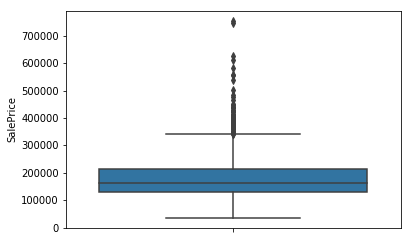

In [27]:
# check the box plot for SalePrice column

sns.boxplot(y=hsg.SalePrice)
plt.show()

In [28]:
# I will remove the records with SalePrice > 320000

hsg = hsg[hsg.SalePrice < 320000]

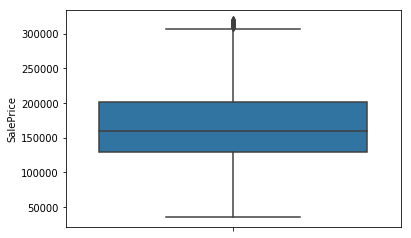

In [29]:
# draw the boxplot again. It should look fine now

sns.boxplot(y=hsg.SalePrice)
plt.show()

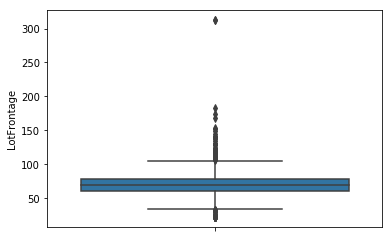

In [30]:
# I will check the outlier in LotFrontage column

sns.boxplot(y=hsg.LotFrontage)
plt.show()

In [31]:
# drop the record having LotFrontage < 35 and > 110

hsg = hsg[(hsg.LotFrontage < 110) & (hsg.LotFrontage > 35)]

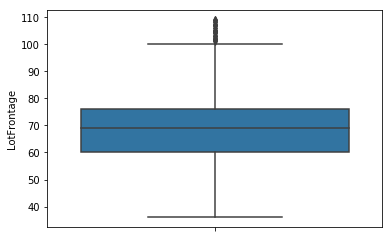

In [32]:
# verify the LotFrontage again

sns.boxplot(y=hsg.LotFrontage)
plt.show()

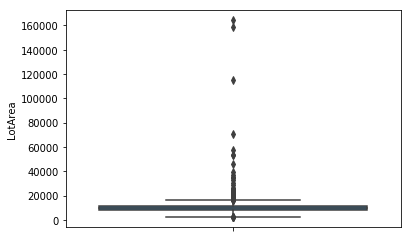

In [33]:
# check and treat the outliers in LotArea

sns.boxplot(y=hsg.LotArea)
plt.show()

In [34]:
# drop record having LotArea >18000 and less than 2500

hsg = hsg[(hsg.LotArea < 18000) & (hsg.LotArea > 2500)]

In [35]:
# check the shape after outlier treatment

hsg.shape

(1170, 61)

## Step 4. Visualising the Data 

`SalePrice' will target variable. I will draw price to see the distribution

#### Univariate and Bivariate analysis

- I will extract the numeric and categorical coulmns.
- Will plot histogram for numeric variables and bar plot (using value_count for categorical columns)

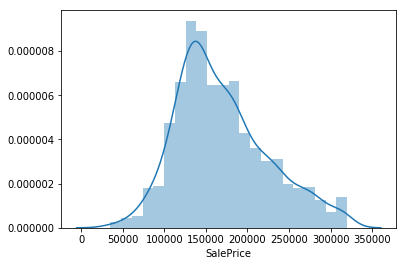

In [36]:
# SalePrice distribution plot

sns.distplot(hsg['SalePrice'])
plt.show()

In [37]:
# import library to check datatype

from pandas.api.types import is_string_dtype, is_numeric_dtype

In [38]:
# find out the list of numeric and categorical columns from hsg dataset

num_list = []
cat_list = []

# for all columns in hsg df find numeric and categorical column
for column in hsg:
    if is_numeric_dtype(hsg[column]):
        num_list.append(column)
    elif is_string_dtype(hsg[column]):
        cat_list.append(column)


print(num_list)
print(cat_list)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'PropertyAge']
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'Remodel']


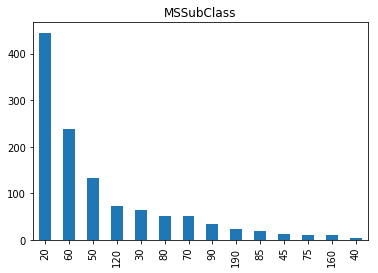

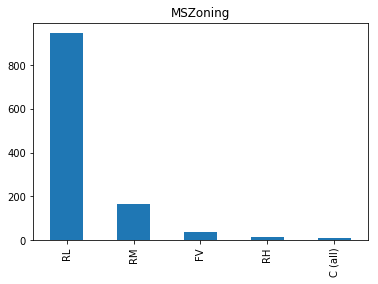

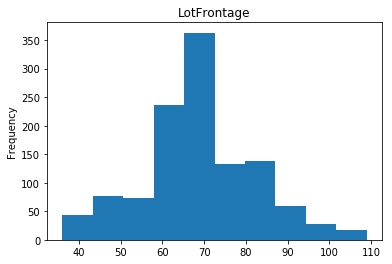

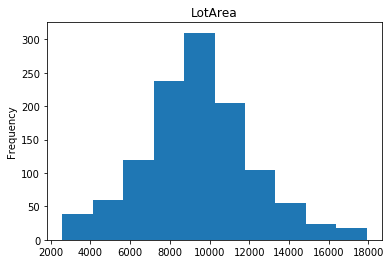

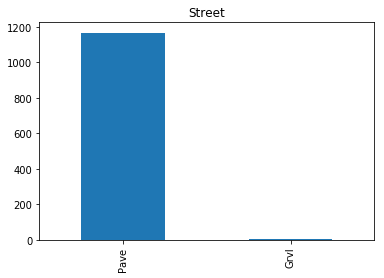

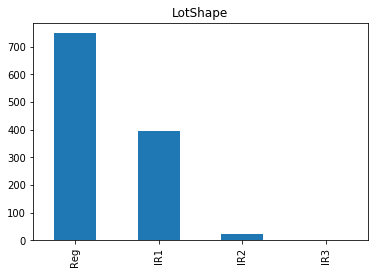

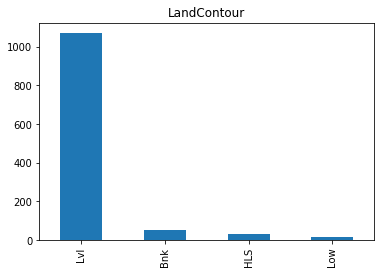

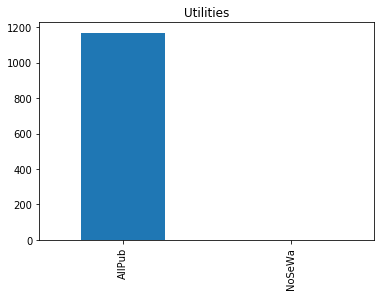

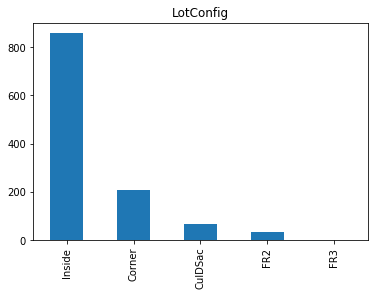

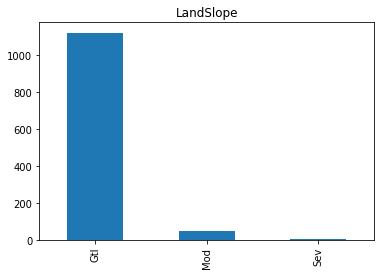

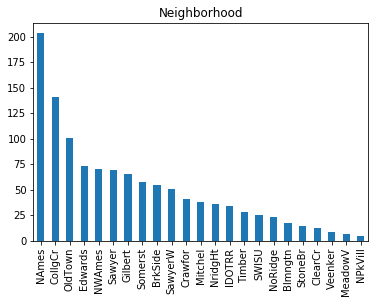

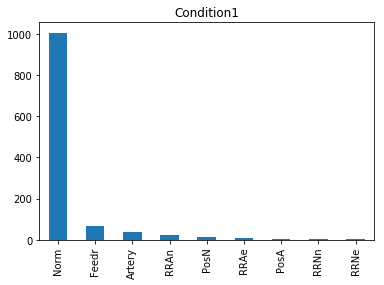

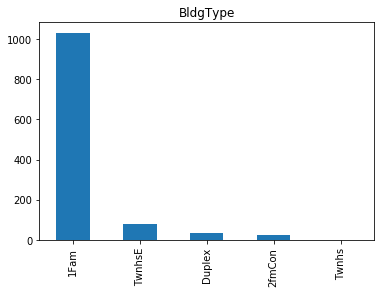

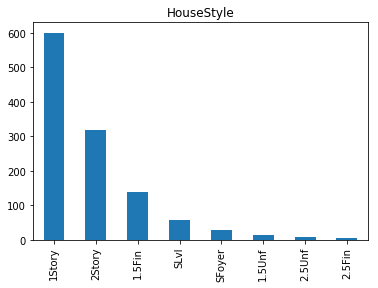

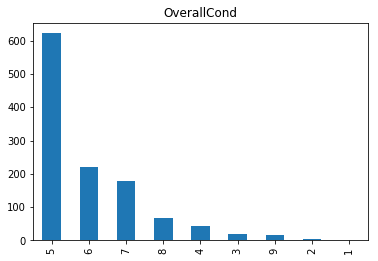

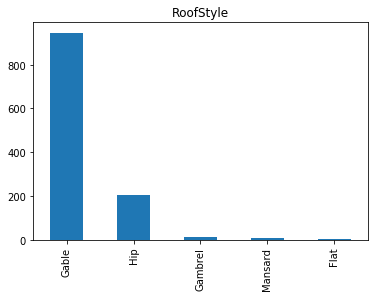

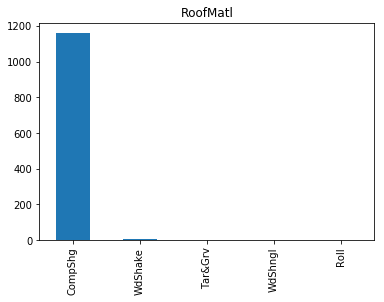

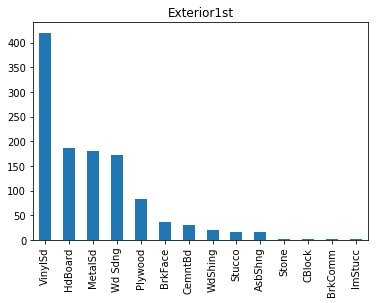

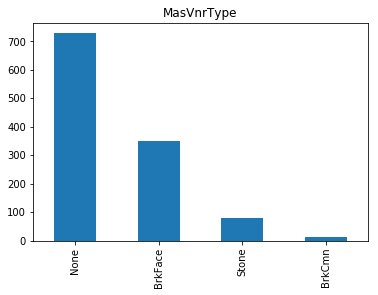

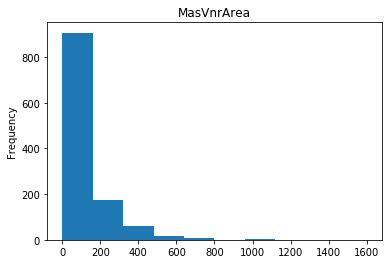

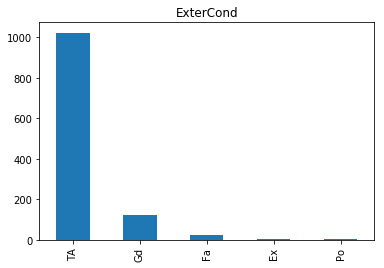

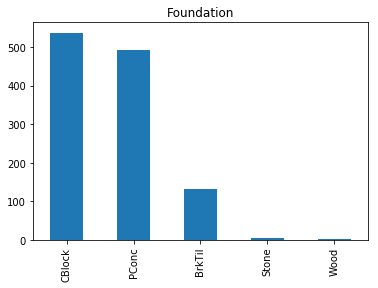

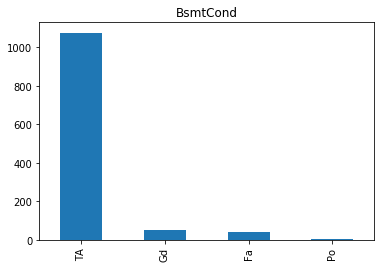

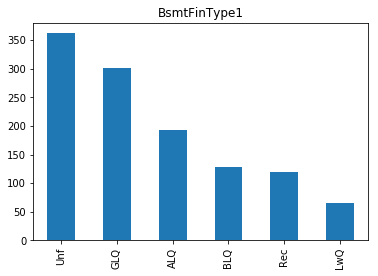

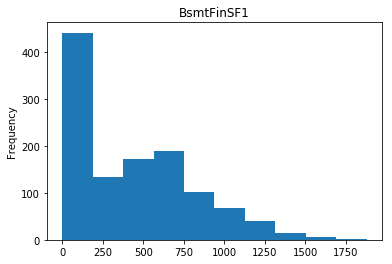

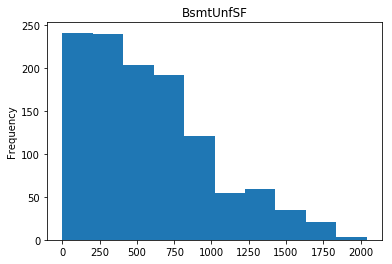

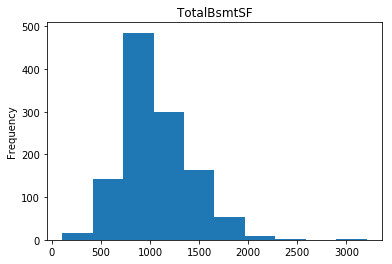

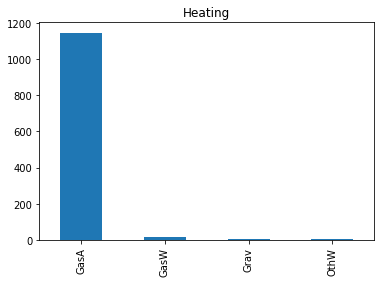

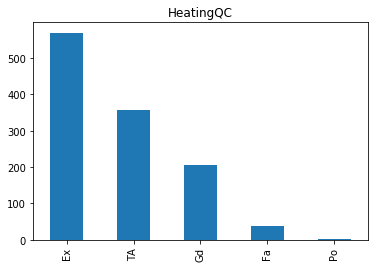

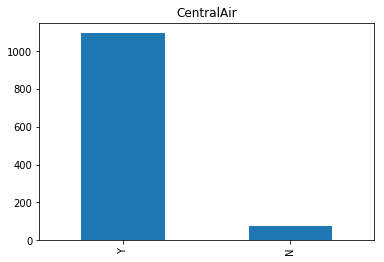

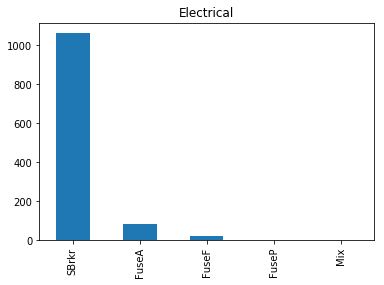

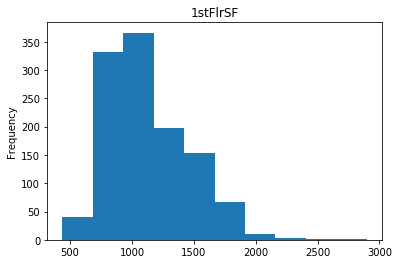

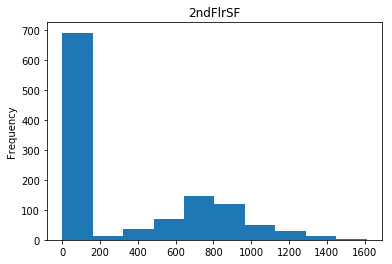

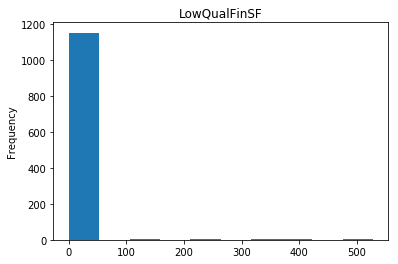

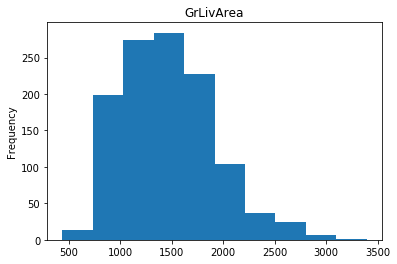

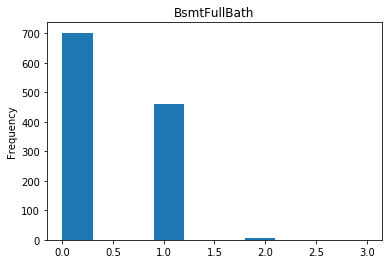

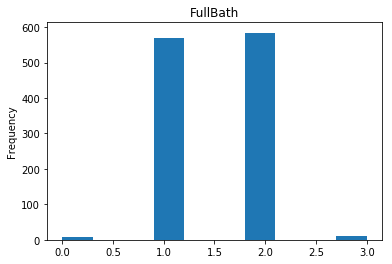

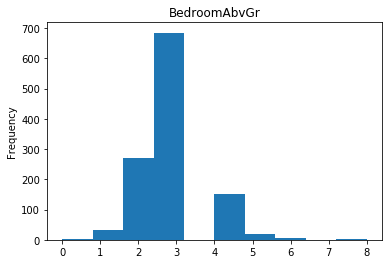

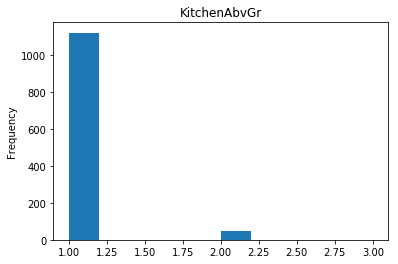

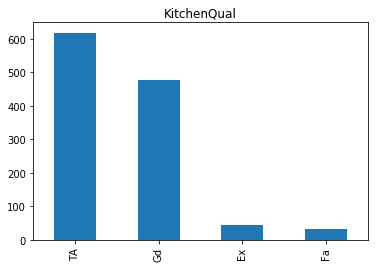

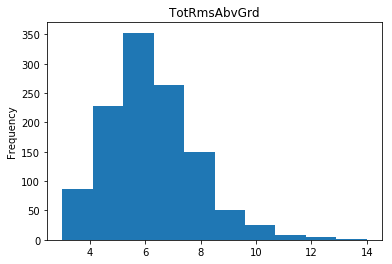

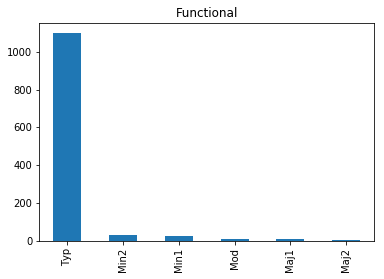

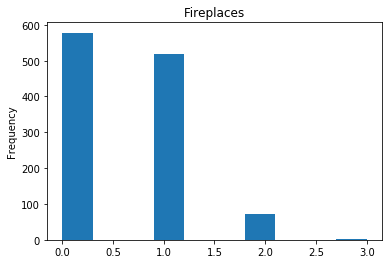

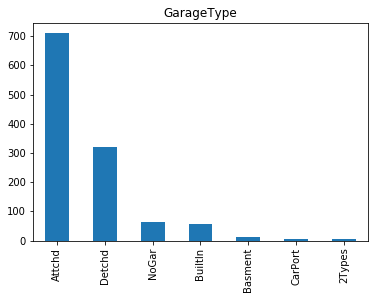

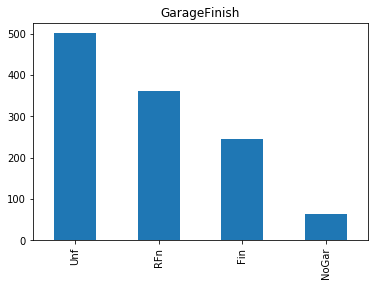

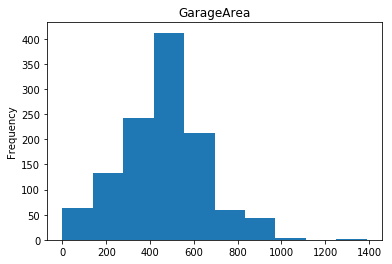

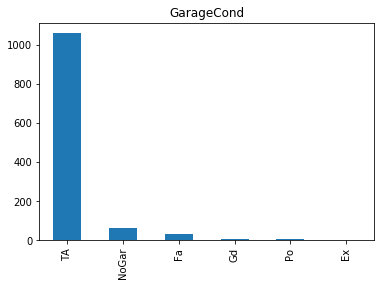

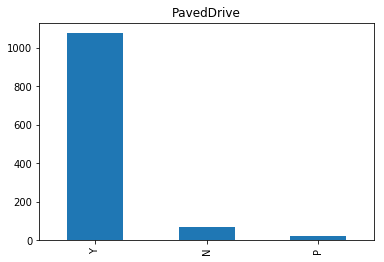

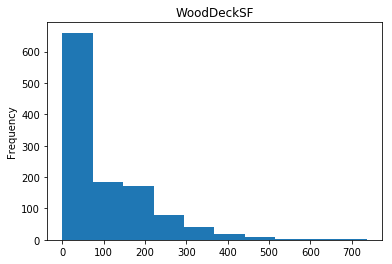

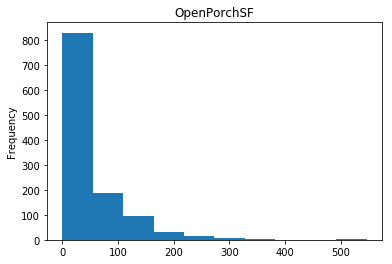

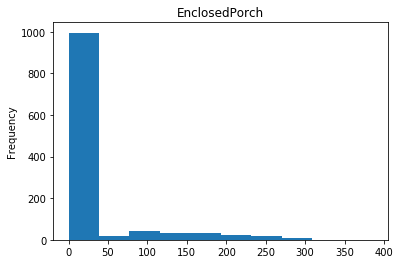

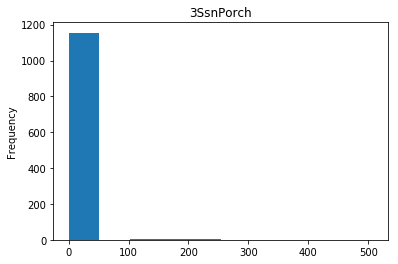

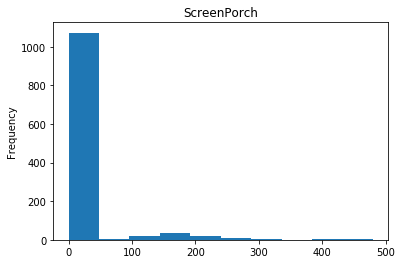

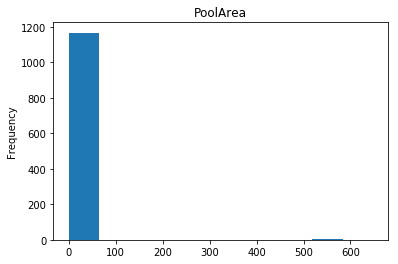

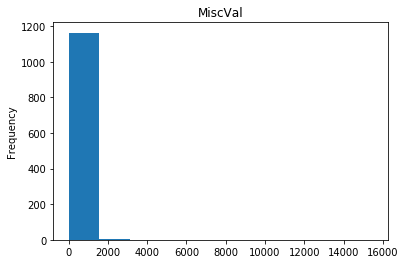

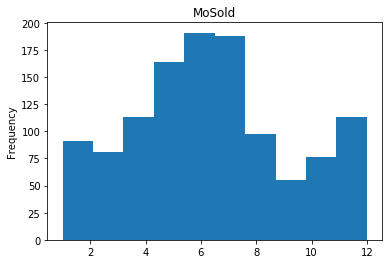

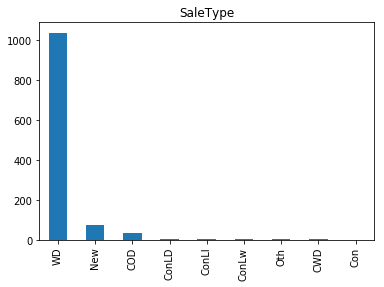

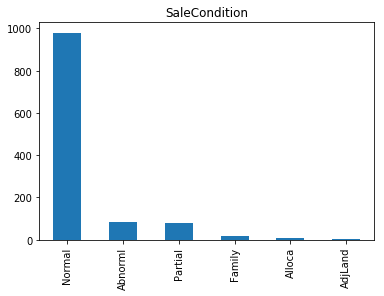

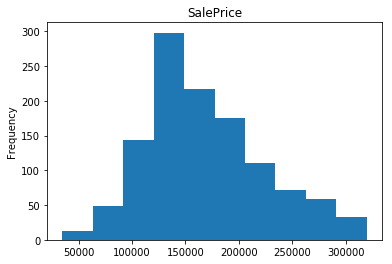

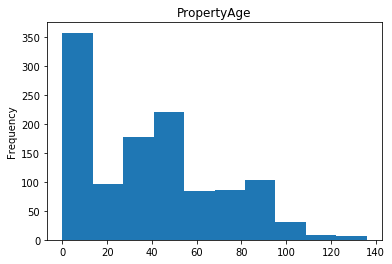

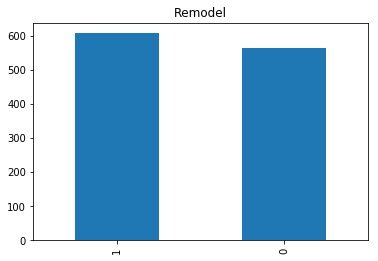

In [39]:
# let's plot all the numeric and categorical columns

for column in hsg:
    plt.figure(column)
    plt.title(column)
    #for numeric plot histogram
    if is_numeric_dtype(hsg[column]):
        hsg[column].plot(kind = 'hist')
    #for categorical plot bargraph
    elif is_string_dtype(hsg[column]):
        hsg[column].value_counts().plot(kind = 'bar') 

plt.show()

In [40]:
# Value count of Street column to show biased data

hsg.Street.value_counts()

Pave    1168
Grvl       2
Name: Street, dtype: int64

## Interfercence from univariate analysis

- `SalePrice` is target variable and it is normally distributed

- There are many variables which has most o fthe value same (almost 90-95% values are same) i.e. `Street` has almost 1454 value as Pave as compared to only 6 Grvl. this variable will not be significant in model building. Below are the total such variables. 
    - 'LotArea', 'Street', 'Utilities', 'LandSlope', 'RoofMatl','BsmtUnfSF', 'Heating', 'Electrical', 'LowQualFinSF', 'Functional, '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
- there are other column which seems non important or duplicate and can be drop. 
    - 'GaeageYrBlt','BldgType', 'MoSold', 'SaleType'','BldgType', 'MoSold', 'SaleType'
    - I will drop all the above columns

## Bivariate analysis

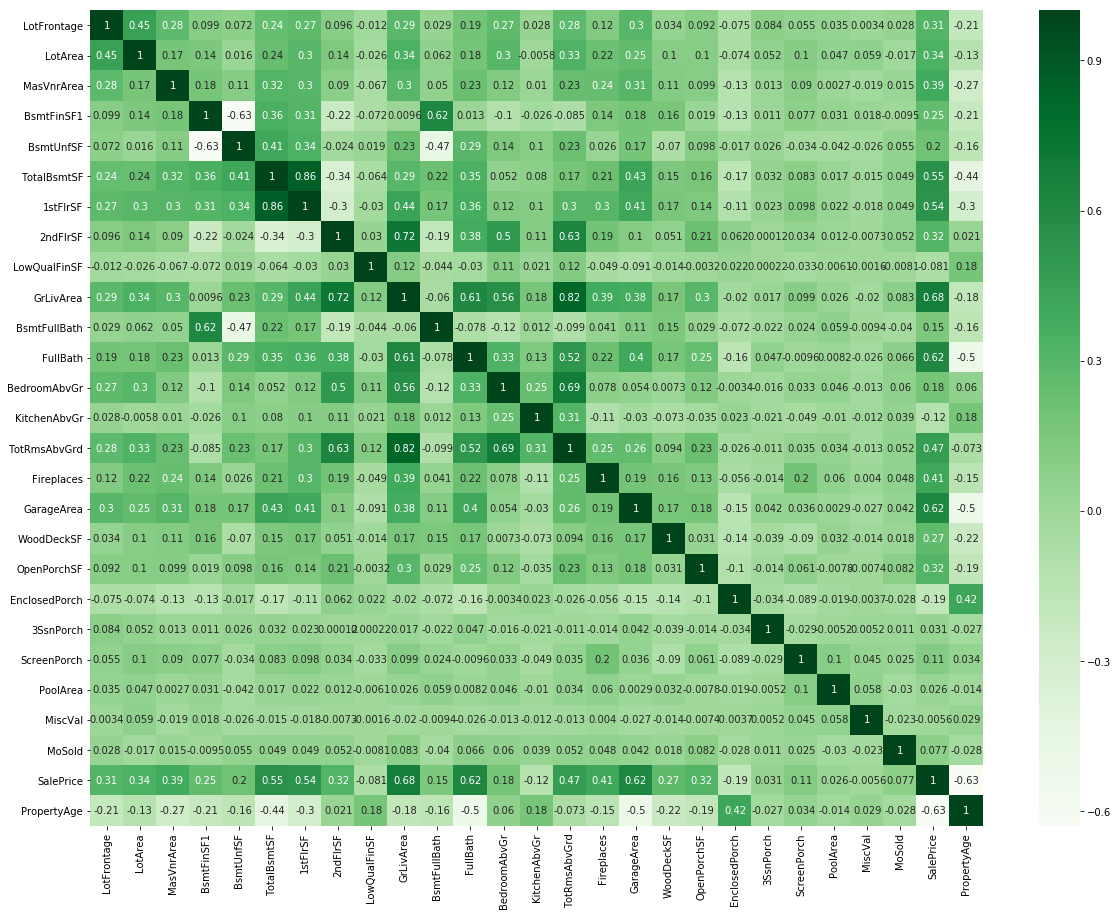

In [41]:
# create correlation matrix and plot heatmap

plt.figure(figsize=(20,15))

correlation = hsg.corr()

sns.heatmap(correlation, cmap = "Greens", annot = True)

plt.show()

### Draw categorical vs target variable plot

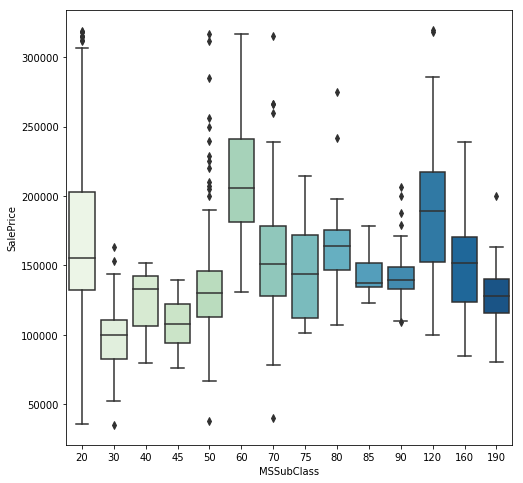

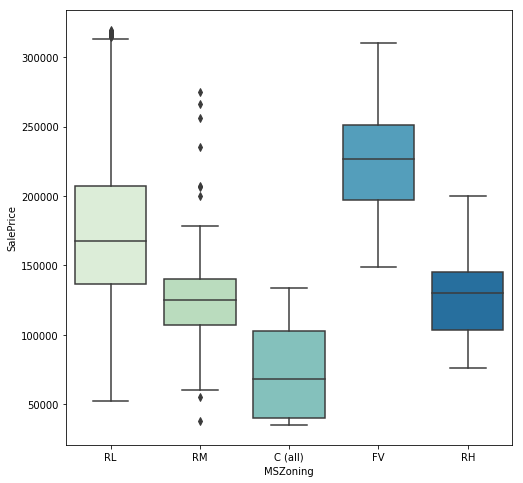

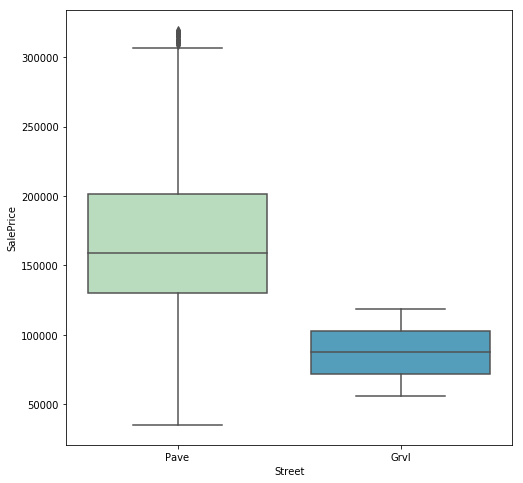

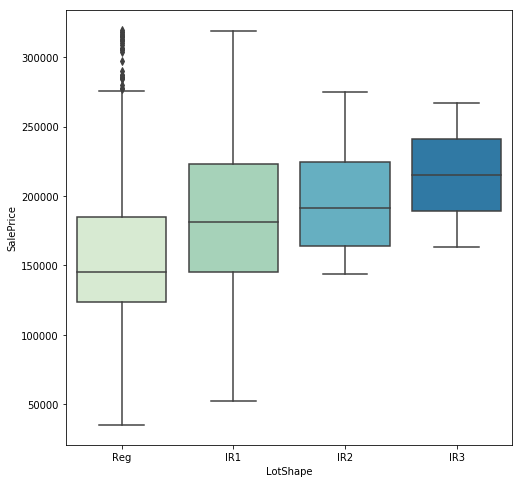

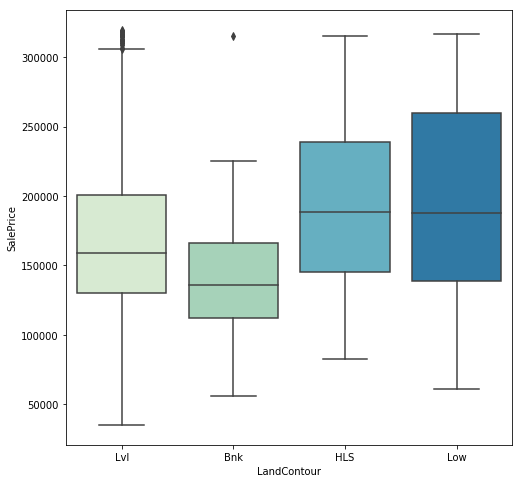

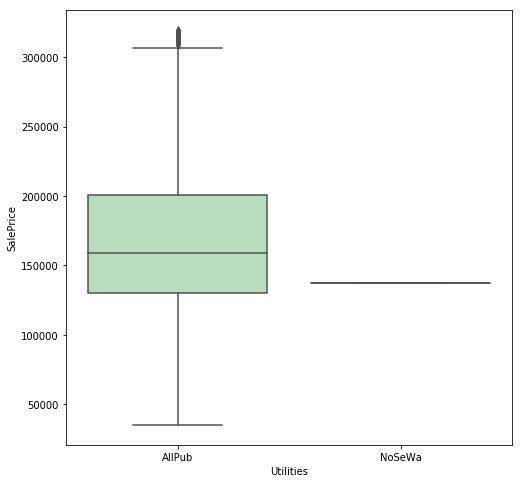

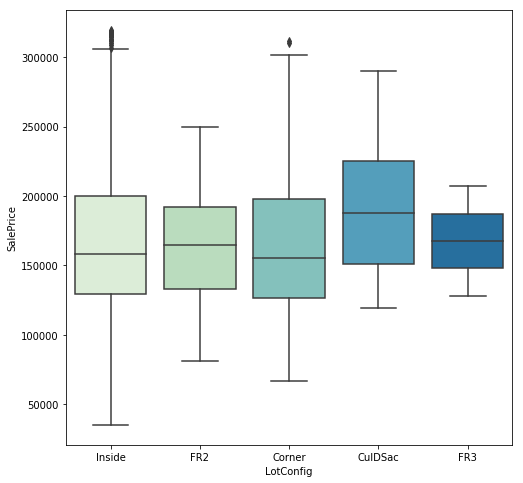

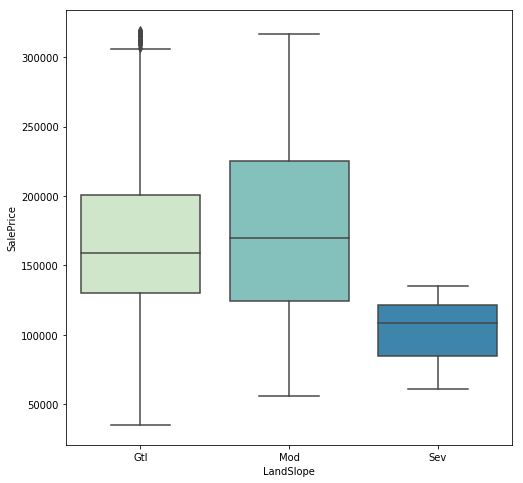

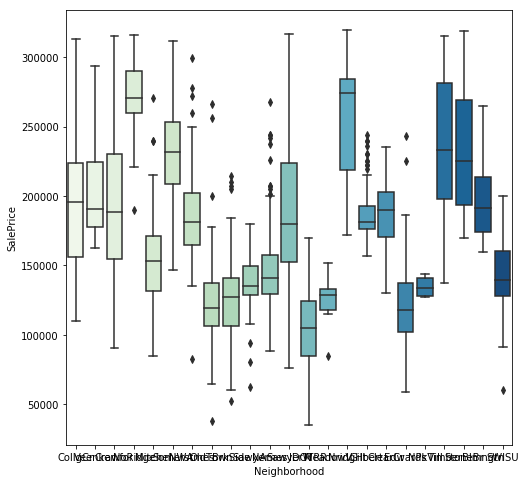

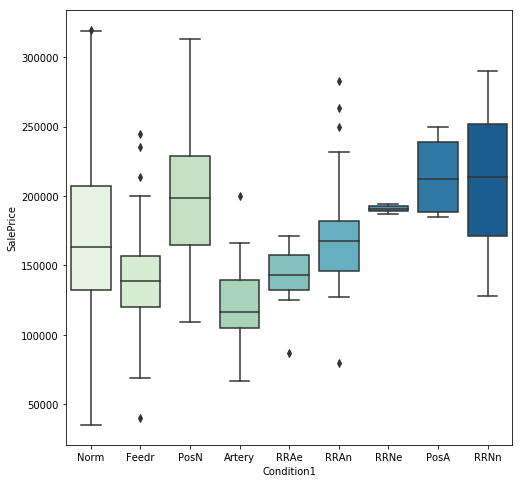

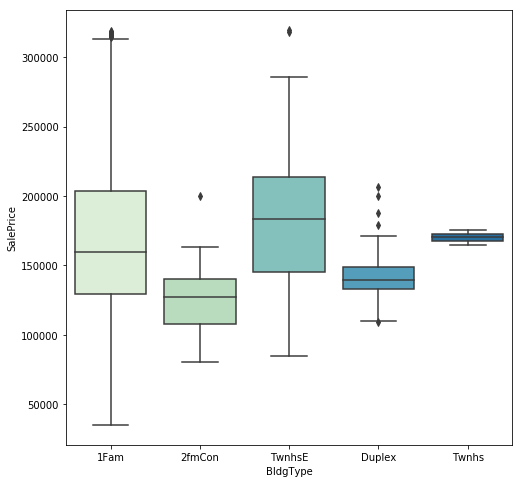

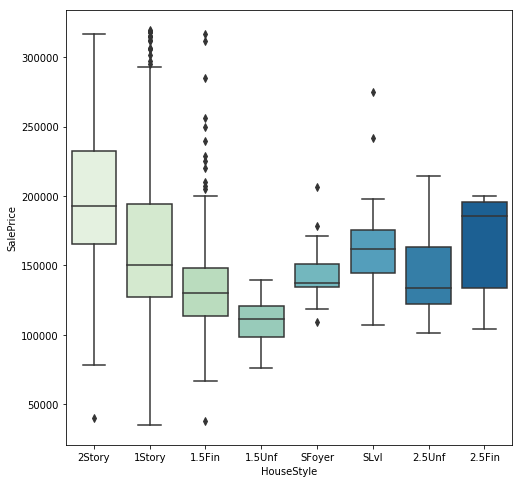

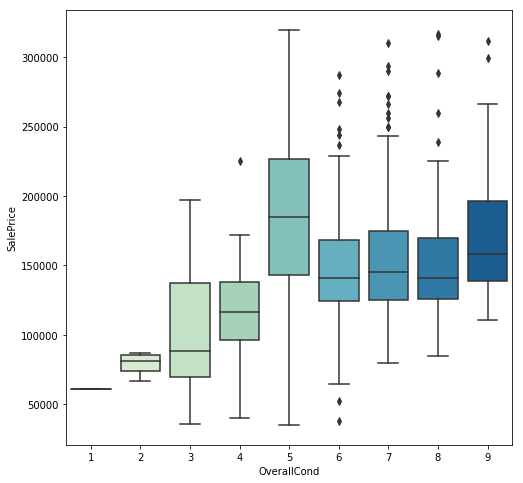

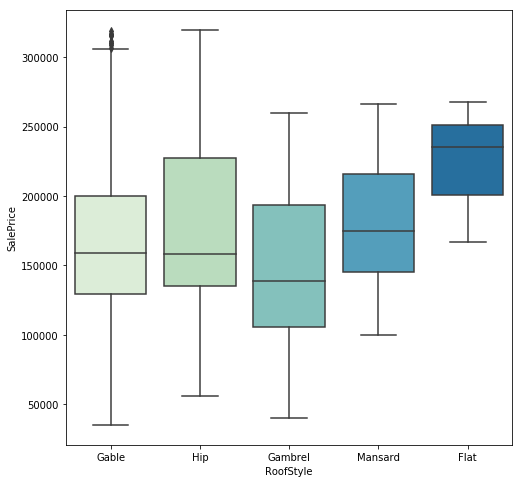

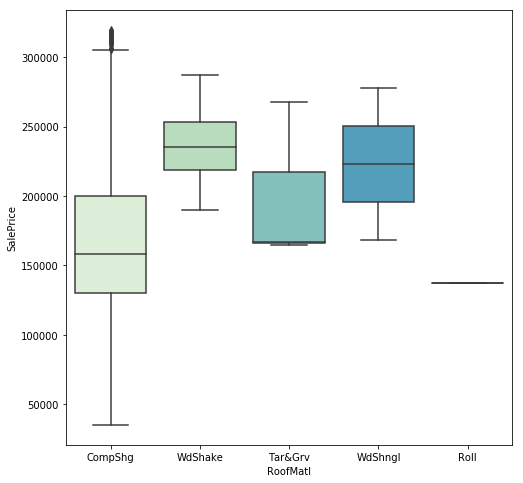

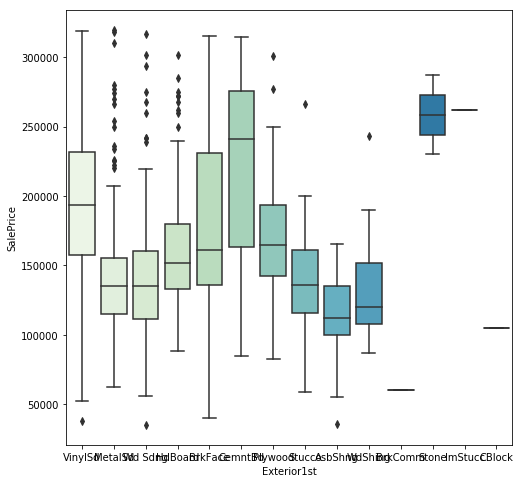

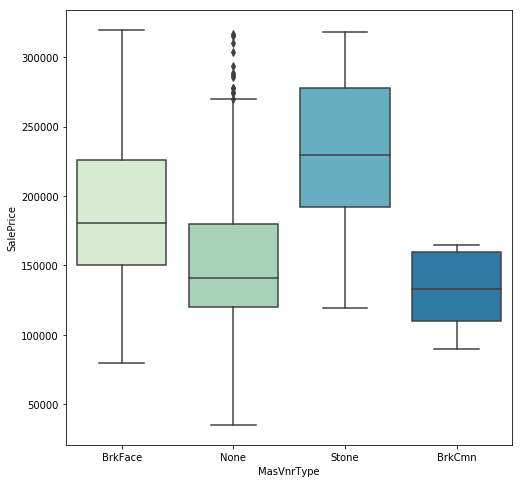

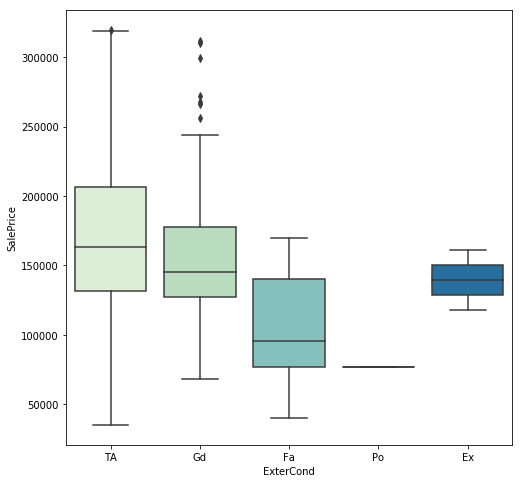

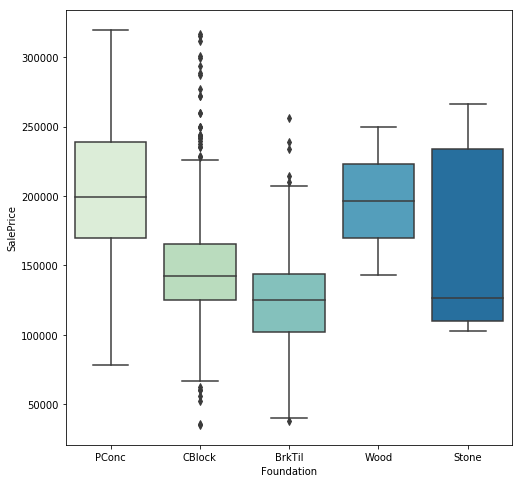

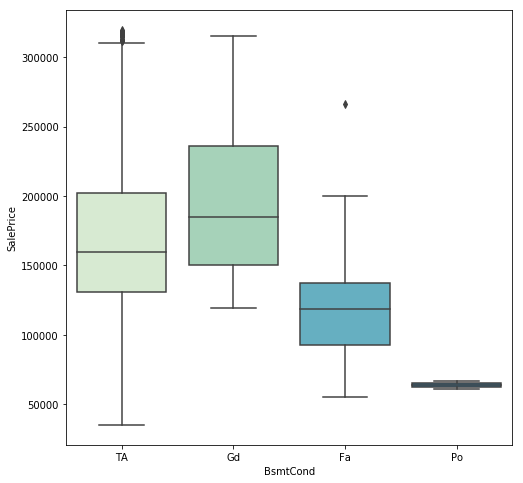

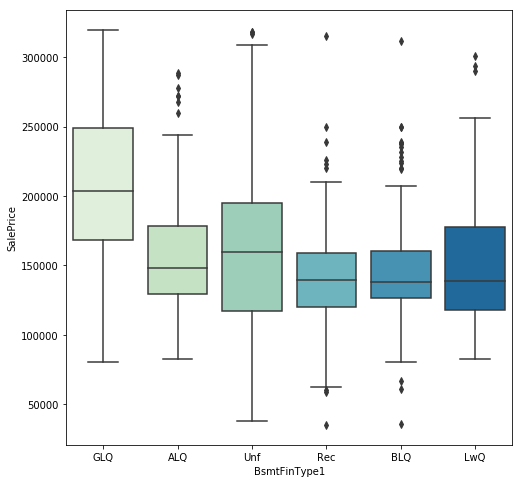

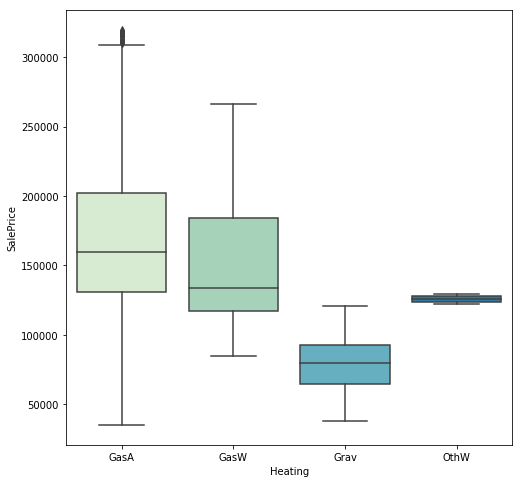

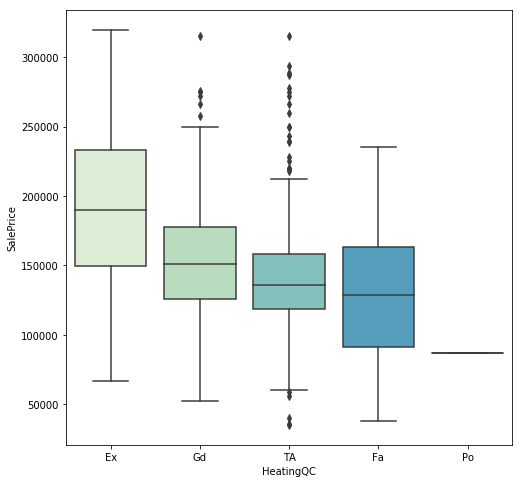

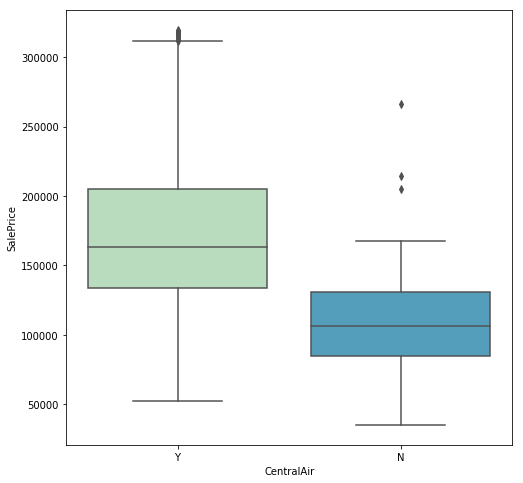

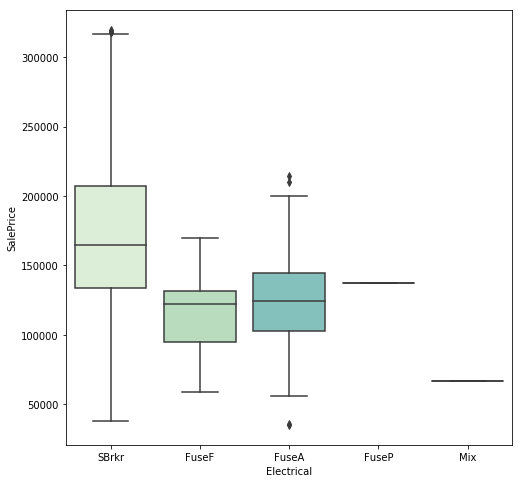

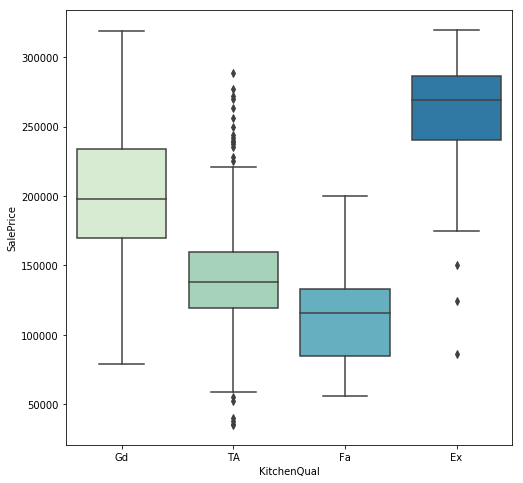

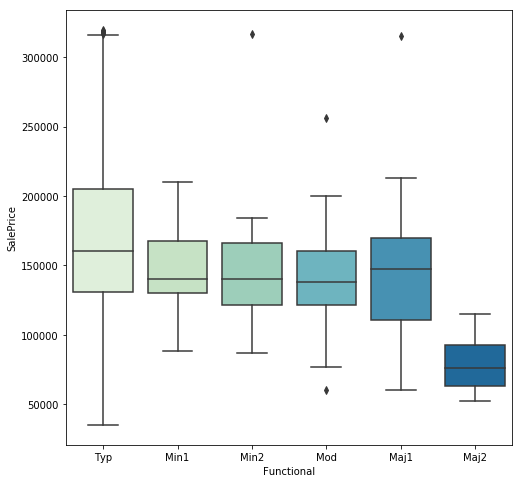

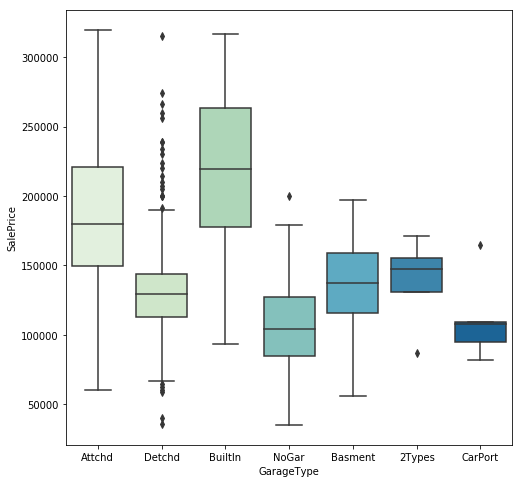

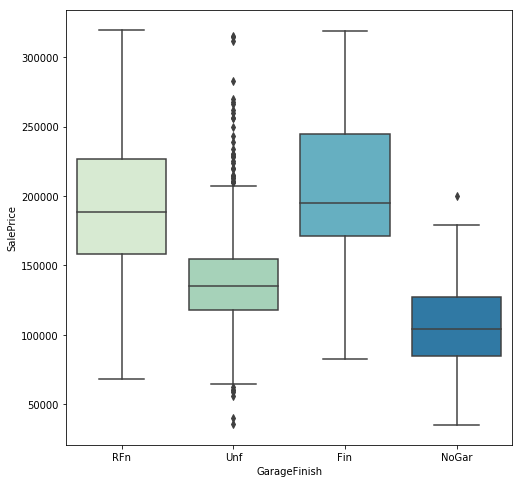

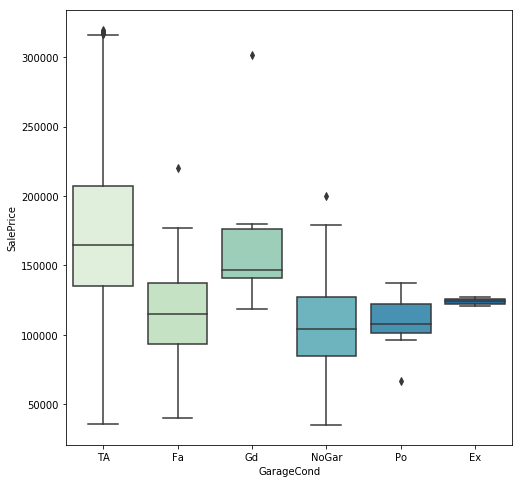

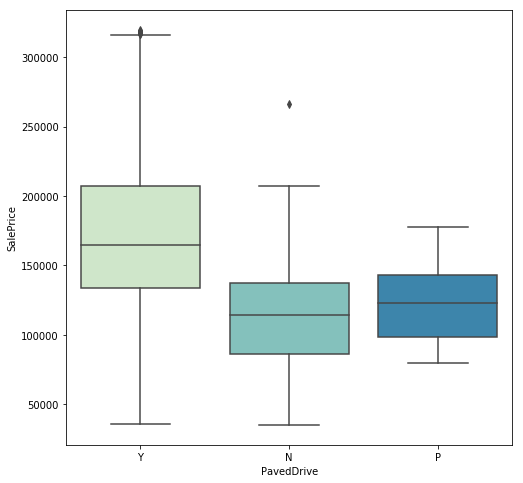

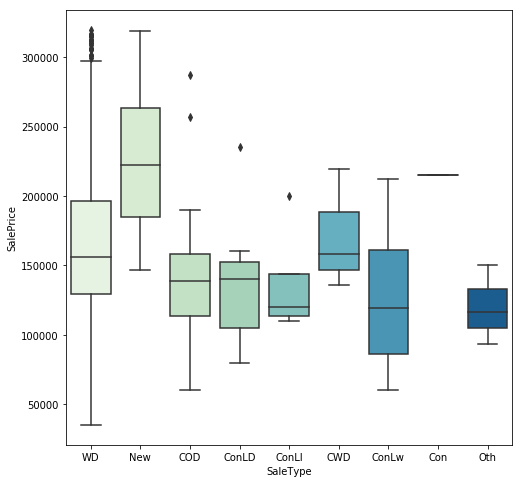

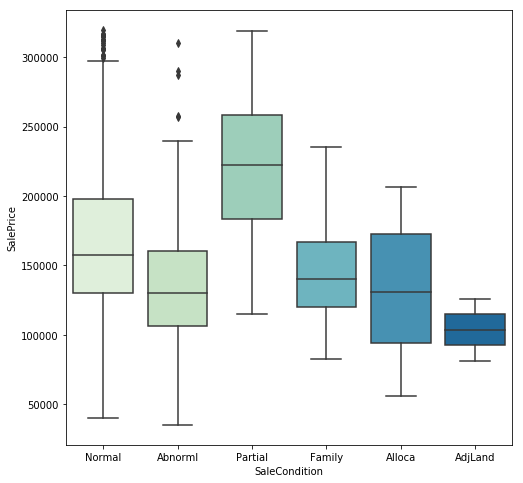

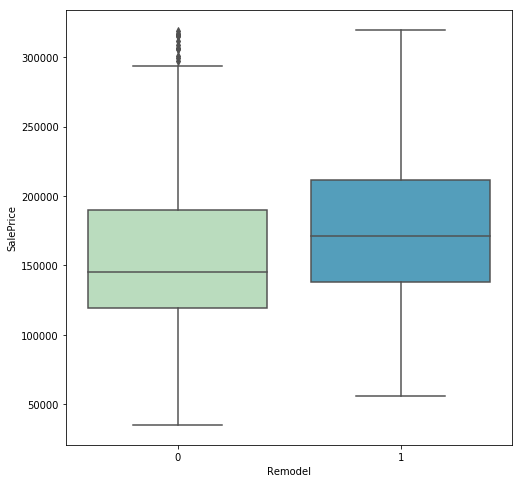

In [42]:
# for each categorical variable as find out above plot box plot with SalePrice

for i in range(0, len(cat_list)):
    cat = cat_list[i]
    num = 'SalePrice'
    plt.figure(figsize = (8,8))
    sns.boxplot(x= cat, y = num, data=hsg, palette = 'GnBu')

plt.show()

### Interfercence from Bivariate analysis
- SalePrice is higly positively correlted with GrLivArea, FullBath, 'GarageYrBlt', 'GarageArea',  
'TotalBsmtSF', '1stFlrSF' and negatively correlated with 'PropertyAge'
- SalePrice is having very low correlation with 'LowQualFinSf', 'BsmtFullBath', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', '3Ssnporch', 'ScreenPorch','PoolArea', 'MiscVal', 'Mosold'. All these columns can be dropped.

- Categorical variable 'Street','Utilities', 'Electrical' is not having much impact on SalePrice and can be dropped

In [43]:
# based on above comment dropping the columns

hsg = hsg.drop(['LotArea', 'Street', 'Utilities', 'LandSlope', 'RoofMatl','BsmtUnfSF', 
                'Heating', 'Electrical', 'LowQualFinSF', 'Functional', '3SsnPorch', 
                'ScreenPorch', 'PoolArea', 'MiscVal','BldgType', 'MoSold', 
                'SaleType', 'Street','Utilities', 'Electrical', 'BsmtFullBath', 
                'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch'], axis =1)

### Now the dataset is cleaned and missing value is treated lets create a new dataset.

In [44]:
# create a new clean dataset as hsg_new. Further processing will be done on new dataset

hsg_new = hsg

In [45]:
# shape and head of new dataset

hsg_new.shape

(1170, 40)

In [46]:
# checking the records

hsg_new.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,Neighborhood,Condition1,HouseStyle,OverallCond,...,GarageFinish,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,PropertyAge,Remodel
0,60,RL,65.0,Reg,Lvl,Inside,CollgCr,Norm,2Story,5,...,RFn,548,TA,Y,0,61,Normal,208500,5,1
1,20,RL,80.0,Reg,Lvl,FR2,Veenker,Feedr,1Story,8,...,RFn,460,TA,Y,298,0,Normal,181500,31,1
2,60,RL,68.0,IR1,Lvl,Inside,CollgCr,Norm,2Story,5,...,RFn,608,TA,Y,0,42,Normal,223500,7,0
3,70,RL,60.0,IR1,Lvl,Corner,Crawfor,Norm,2Story,5,...,Unf,642,TA,Y,0,35,Abnorml,140000,91,0
4,60,RL,84.0,IR1,Lvl,FR2,NoRidge,Norm,2Story,5,...,RFn,836,TA,Y,192,84,Normal,250000,8,1


In [47]:
# extract all numeric (float and int) variables in the dataset


hsg_numeric = hsg_new.select_dtypes(include=['float64', 'int64'])
hsg_numeric.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,PropertyAge
0,65.0,196.0,706,856,856,854,1710,2,8,0,548,0,61,208500,5
1,80.0,0.0,978,1262,1262,0,1262,2,6,1,460,298,0,181500,31
2,68.0,162.0,486,920,920,866,1786,2,6,1,608,0,42,223500,7
3,60.0,0.0,216,756,961,756,1717,1,7,1,642,0,35,140000,91
4,84.0,350.0,655,1145,1145,1053,2198,2,9,1,836,192,84,250000,8


## Step 5: Data Preparation

### Dummy Variables
- We will convert all categorical variable into dummy variables
- define a function to create dummy variables 
- Will first create a list of all categorical variable
- remove the binary variables from the list and call function for remaining variable 


In [48]:
# map the Y/N value of CentralAir as 1 and 0

hsg_new.CentralAir = hsg_new.CentralAir.map({'Y': 1, 'N': 0})

In [49]:
# define function to create dummy variable. Will add column name as prefix and drop the first dummy variable 


def dummy_v(var):
    dv = pd.get_dummies(hsg_new[var], prefix = var, drop_first = True)
    return(dv)

In [50]:
# create list of categorical variables

cat_list = []

for column in hsg_new:
    if is_string_dtype(hsg_new[column]):
        cat_list.append(column)

print(cat_list)

['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallCond', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleCondition', 'Remodel']


### `CentralAir` and `Remodel` are binary variables. I will remove these two from the categorical variable list and call function for remaining variable

In [51]:
# define a list of categorical variables
# call function for each categorical variable in loop to create dummy variables 
# concatenate with hsg_new
# drop the redundant variable after concatenating the dummy variable

print("Shape of dataset before dummy variables:", hsg_new.shape)

cat_var = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 
           'Condition1', 'HouseStyle', 'OverallCond', 'RoofStyle', 'Exterior1st', 'MasVnrType', 
           'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType1', 'HeatingQC',
           'KitchenQual', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleCondition']


for var in cat_var:
    var_dv = var+"_dv"
    var_dv = dummy_v(var)
    hsg_new = pd.concat([hsg_new,var_dv], axis=1)
    hsg_new.drop(var, axis=1, inplace = True)
        
print("Shape of dataset after dummy variables :", hsg_new.shape)

Shape of dataset before dummy variables: (1170, 40)
Shape of dataset after dummy variables : (1170, 153)


In [52]:
# top records after concatenating dummy variables

hsg_new.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,GarageCond_NoGar,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,196.0,706,856,1,856,854,1710,2,8,...,0,0,1,0,1,0,0,0,1,0
1,80.0,0.0,978,1262,1,1262,0,1262,2,6,...,0,0,1,0,1,0,0,0,1,0
2,68.0,162.0,486,920,1,920,866,1786,2,6,...,0,0,1,0,1,0,0,0,1,0
3,60.0,0.0,216,756,1,961,756,1717,1,7,...,0,0,1,0,1,0,0,0,0,0
4,84.0,350.0,655,1145,1,1145,1053,2198,2,9,...,0,0,1,0,1,0,0,0,1,0


## Step 6: Splitting the Data into Training and Testing Sets

The first basic step for model building is performing a train-test split. I wil divide the data into train and test test with a split of 80:20.

In [53]:
# import train_test_split module and split the data in train and test set

from sklearn.model_selection import train_test_split
np.random.seed(0)
hsg_train, hsg_test = train_test_split(hsg_new, train_size = 0.8, random_state=100)

In [54]:
# check the shape of train and test dataset

print('Shape of train set:', hsg_train.shape)
print('Shape of test set :', hsg_test.shape)

Shape of train set: (936, 153)
Shape of test set : (234, 153)


In [55]:
# top records

hsg_train.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,GarageCond_NoGar,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,70.0,0.0,663,1059,1,1068,0,1068,1,6,...,0,0,1,0,1,0,0,0,1,0
1076,60.0,0.0,626,796,1,1096,370,1466,2,7,...,0,0,1,0,1,0,0,0,1,0
331,70.0,0.0,846,1056,1,1056,0,1056,1,6,...,0,0,1,0,1,0,0,0,1,0
184,92.0,0.0,0,504,1,936,316,1252,1,5,...,0,0,1,0,1,0,0,0,1,0
574,70.0,82.0,349,372,1,576,533,1109,1,5,...,0,0,1,0,1,0,0,0,1,0


### Rescaling the Features 
- will apply resacling for numeric columns	
- will use MinMax scaling

In [56]:
#numeric columns in hsg_new

hsg_numeric.columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'PropertyAge'],
      dtype='object')

In [57]:
# creating temp dataframe for numeric columns to check the values before scaling

hsg_vars = list(hsg_numeric.columns)

hsg_num_df = hsg_train[hsg_vars]
hsg_num_df.describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,PropertyAge
count,936.000000,936.000000,936.00000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,68.955128,84.927350,416.90812,1050.780983,1133.271368,310.141026,1449.381410,1.503205,6.379274,0.567308,454.904915,89.680556,42.450855,169142.132479,38.555556
std,13.345195,151.160619,395.90797,330.175047,322.868469,412.925241,444.962387,0.531359,1.487329,0.616840,202.111338,119.341282,62.257201,55729.141773,30.062059
min,36.000000,0.000000,0.00000,105.000000,480.000000,0.000000,480.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,60.000000,0.000000,0.00000,816.000000,888.750000,0.000000,1102.750000,1.000000,5.000000,0.000000,308.000000,0.000000,0.000000,129900.000000,10.000000
50%,69.000000,0.000000,379.50000,992.500000,1068.500000,0.000000,1416.000000,1.500000,6.000000,1.000000,470.000000,0.000000,20.000000,158950.000000,37.000000
75%,76.250000,136.000000,685.00000,1241.500000,1344.000000,703.250000,1718.000000,2.000000,7.000000,1.000000,572.000000,164.250000,63.000000,201000.000000,57.000000
max,109.000000,1600.000000,1606.00000,2524.000000,2898.000000,1611.000000,3395.000000,3.000000,14.000000,3.000000,1390.000000,728.000000,523.000000,319900.000000,136.000000


In [58]:
# import Min Max scaler

from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

In [60]:
# Apply scaler() to all the numeric columns 

hsg_vars = list(hsg_numeric.columns)

hsg_train[hsg_vars] = scaler.fit_transform(hsg_train[hsg_vars])

In [61]:
# creating temp dataframe for numeric columns to check the values after scaling

hsg_num_df = hsg_train[hsg_vars]
hsg_num_df.describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,PropertyAge
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.451440,0.053080,0.259594,0.390980,0.270170,0.192515,0.332549,0.501068,0.307207,0.189103,0.327270,0.123188,0.081168,0.471025,0.283497
std,0.182811,0.094475,0.246518,0.136492,0.133527,0.256316,0.152646,0.177120,0.135212,0.205613,0.145404,0.163930,0.119039,0.195541,0.221045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.328767,0.000000,0.000000,0.293923,0.169045,0.000000,0.213636,0.333333,0.181818,0.000000,0.221583,0.000000,0.000000,0.333333,0.073529
50%,0.452055,0.000000,0.236301,0.366887,0.243383,0.000000,0.321098,0.500000,0.272727,0.333333,0.338129,0.000000,0.038241,0.435263,0.272059
75%,0.551370,0.085000,0.426526,0.469822,0.357320,0.436530,0.424700,0.666667,0.363636,0.333333,0.411511,0.225618,0.120459,0.582807,0.419118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
# transform the hsg_test dataset 

hsg_test[hsg_vars] = scaler.transform(hsg_test[hsg_vars])

In [63]:
# hsg_train head

hsg_train.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,GarageCond_NoGar,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.465753,0.00000,0.412827,0.394378,1,0.243176,0.000000,0.201715,0.333333,0.272727,...,0,0,1,0,1,0,0,0,1,0
1076,0.328767,0.00000,0.389788,0.285655,1,0.254756,0.229671,0.338250,0.666667,0.363636,...,0,0,1,0,1,0,0,0,1,0
331,0.465753,0.00000,0.526775,0.393138,1,0.238213,0.000000,0.197599,0.333333,0.272727,...,0,0,1,0,1,0,0,0,1,0
184,0.767123,0.00000,0.000000,0.164944,1,0.188586,0.196151,0.264837,0.333333,0.181818,...,0,0,1,0,1,0,0,0,1,0
574,0.465753,0.05125,0.217310,0.110376,1,0.039702,0.330850,0.215780,0.333333,0.181818,...,0,0,1,0,1,0,0,0,1,0


In [64]:
# SalePrice describe

hsg_train.SalePrice.describe()

count    936.000000
mean       0.471025
std        0.195541
min        0.000000
25%        0.333333
50%        0.435263
75%        0.582807
max        1.000000
Name: SalePrice, dtype: float64

## Step 7. Feature selection

- There are 153 features in the dataset and I will use RFE to select top 50 features
- First divide the into X and y
- Build linear model and use RFE to select top features

### Divide into X and y sets for model building

In [65]:
# create y sets with target variable (SalePrice) and X sets with remaining columns

y_train = hsg_train.pop('SalePrice')
X_train = hsg_train

print(X_train.shape)

(936, 152)


In [66]:
# import LinearRegression and RFE

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [67]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [68]:
# check the rfe support and ranking for each columns

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 31),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 75),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 85),
 ('GrLivArea', True, 1),
 ('FullBath', False, 99),
 ('TotRmsAbvGrd', False, 53),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 20),
 ('OpenPorchSF', False, 16),
 ('PropertyAge', True, 1),
 ('Remodel', False, 94),
 ('MSSubClass_30', False, 49),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', False, 18),
 ('MSSubClass_50', False, 50),
 ('MSSubClass_60', False, 55),
 ('MSSubClass_70', False, 37),
 ('MSSubClass_75', False, 42),
 ('MSSubClass_80', False, 41),
 ('MSSubClass_85', False, 32),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', True, 1),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_190', False, 102),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 38),
 ('LotShape_IR3', False, 66),
 ('Lo

In [69]:
# select 50 columns as per rfe support

col_supp = X_train.columns[rfe.support_]
col_supp

Index(['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'Fireplaces', 'GarageArea', 'PropertyAge', 'MSSubClass_40',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'Condition1_RRAe', 'HouseStyle_2.5Fin', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'ExterCond_Po', 'Foundation_Wood',
       'BsmtCond_Po', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NoGar',
       'GarageFinish_NoGar', 'GarageCon

In [70]:
# create X_train from RFE support columns

X_train_rfe = X_train[col_supp]
X_train_rfe.shape

(936, 50)

In [71]:
# create y sets with target variable (cnt) and X sets with remaining columns

y_test = hsg_test.pop('SalePrice')
X_test = hsg_test
print(X_test.shape)

(234, 152)


In [72]:
# create X_test from RFE support columns

X_test_rfe = X_test[col_supp]
X_test_rfe.shape

(234, 50)

## Step8. Model Building and Evaluation
- From the selected columns we build model
- First will build Linear regression model and check intercept and beta coefficients
- Model will be evaluated using r2_score, MSE and RMSE

- will then apply Ridge and lasso regression and check intercept and beta coefficients
- Model will be evaluated then using r2_score, MSE and RMSE


In [73]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
# Print the coefficients and intercept

print(lm.intercept_)
print(lm.coef_)

0.0932573890676
[ 0.07370428  0.08121039  0.26644804 -0.06817156  0.53132944  0.068141
  0.18774012 -0.24131586 -0.04660413 -0.08488382 -0.04355701 -0.08280973
  0.20440582  0.12623172  0.15630331  0.14466294  0.08225261 -0.04967617
 -0.0638651  -0.0445972  -0.05480165 -0.05956686  0.06748915 -0.04409526
 -0.0450074   0.08871021 -0.08542032 -0.1028638  -0.06426773 -0.04832302
  0.04468777  0.0715006   0.09973493 -0.06577404 -0.05551911 -0.1175499
 -0.03921295 -0.12015003 -0.13698103 -0.10897574 -0.13705274  0.13270405
  0.11829064  0.14747979  0.14038191  0.12013432  0.04834095  0.04834095
  0.04834095  0.04540076]


In [75]:
# predicat the y value for train and test

y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

print('metrics for linear regresssion:-')
# init the metric list
metric = []

# r2_score for train set
r2_train_lr = r2_score(y_true=y_train, y_pred = y_pred_train)
print("r2_score for train set:", r2_train_lr)
metric.append(r2_train_lr)

# r2_score for test set
r2_test_lr = r2_score(y_true = y_test, y_pred = y_pred_test)
print("r2_score for test set:", r2_test_lr)
metric.append(r2_test_lr)

# calculate RSS for train set
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train set:", rss1_lr)
metric.append(rss1_lr)

# calculate RSS for test set
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test set:", rss2_lr)
metric.append(rss2_lr)

# calculate MSE for train set
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train set:", mse_train_lr)
metric.append(mse_train_lr**0.5)

# calculate MSE for test set
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test set:", mse_test_lr)
metric.append(mse_test_lr**0.5)

metrics for linear regresssion:-
r2_score for train set: 0.894984044542
r2_score for test set: 0.884781249935
RSS for train set: 3.754411650311162
RSS for test set: 0.9760853396834211
MSE for train set: 0.00401112355802
MSE for test set: 0.00417130487044


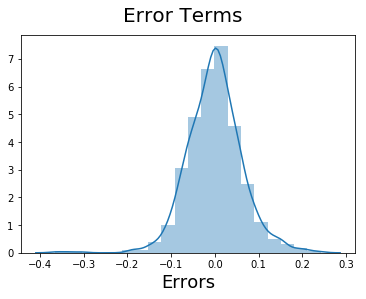

In [76]:
# plot the histogram of the error terms

fig = plt.figure()
err = y_train - y_pred_train
sns.distplot(err, bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

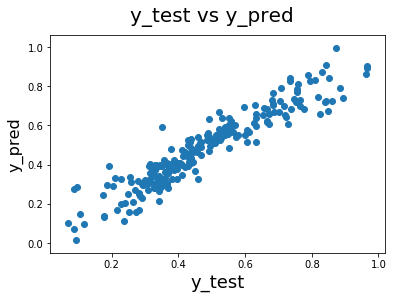

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.show()

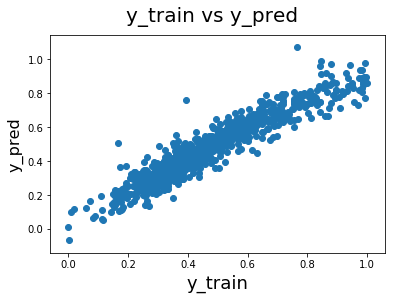

In [78]:
# Plotting y_train and y_pred_train to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_pred_train)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

## Ridge and Lasso Regression

Let's now try predicting sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [79]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

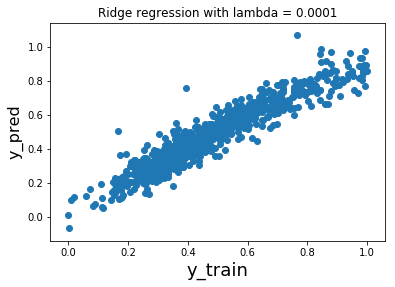

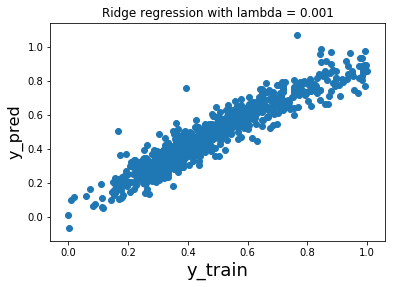

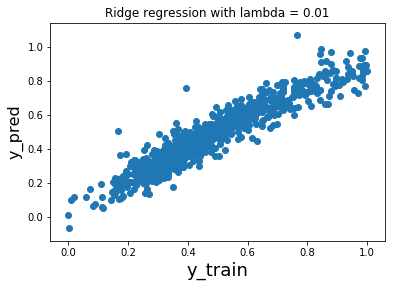

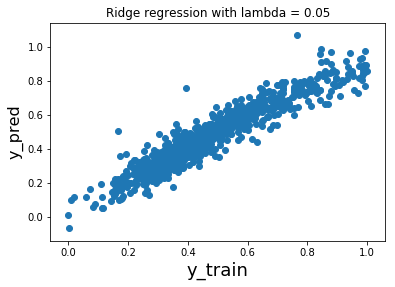

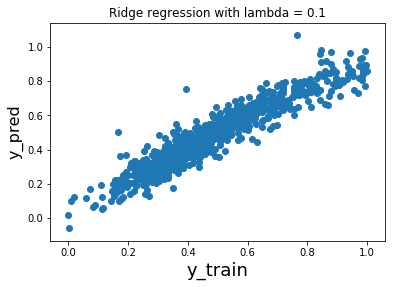

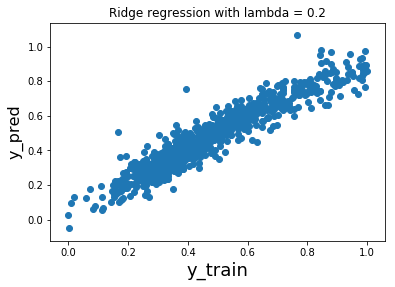

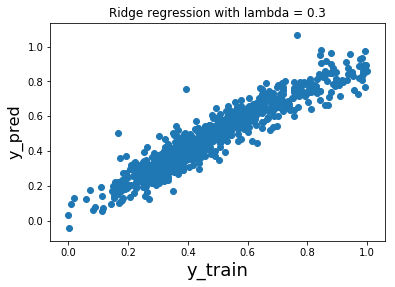

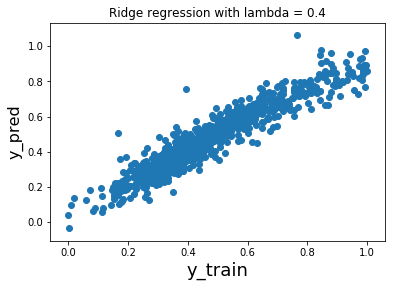

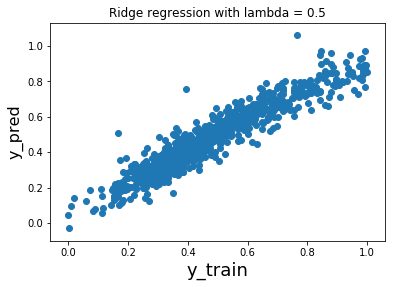

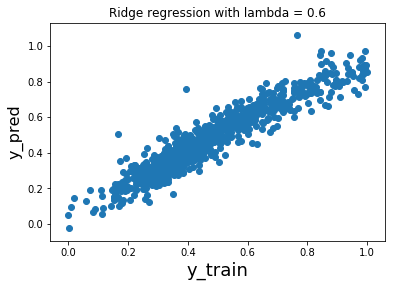

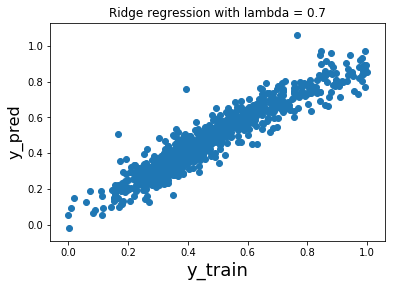

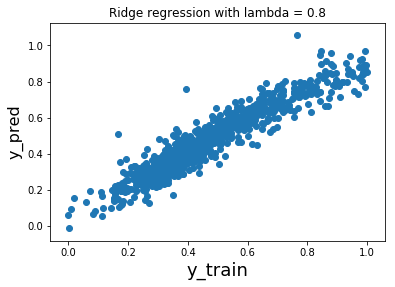

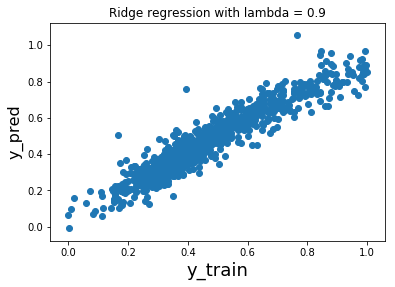

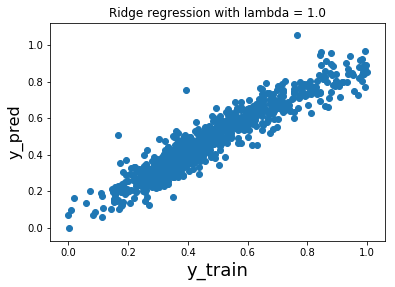

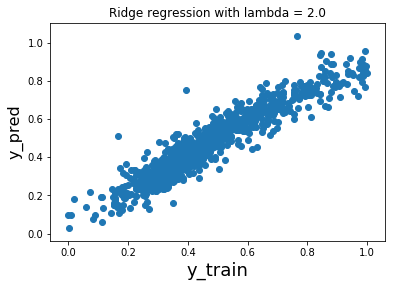

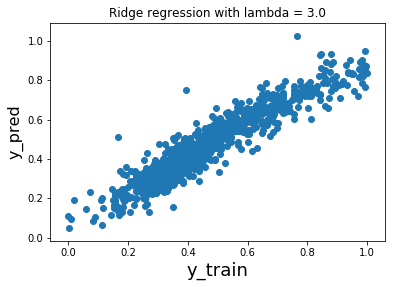

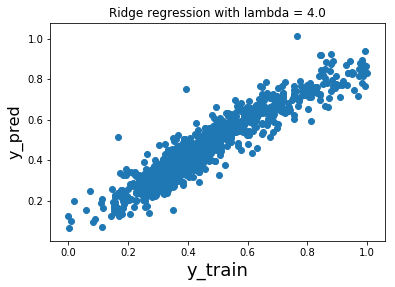

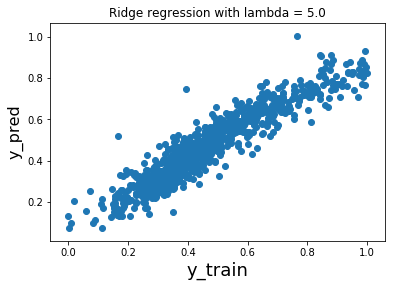

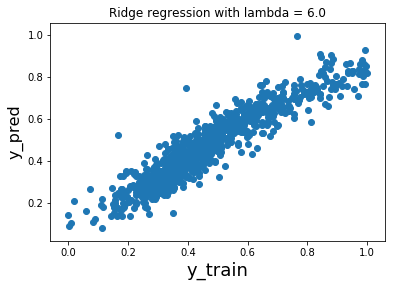

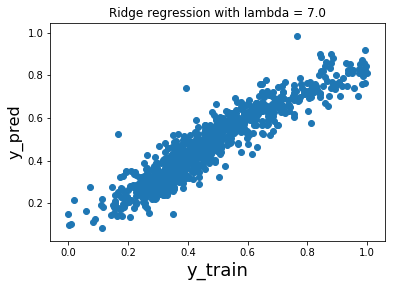

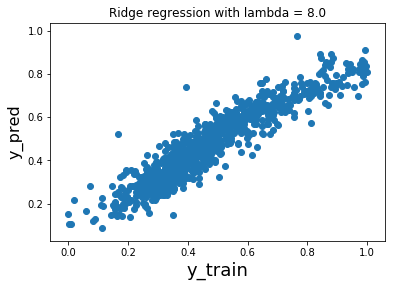

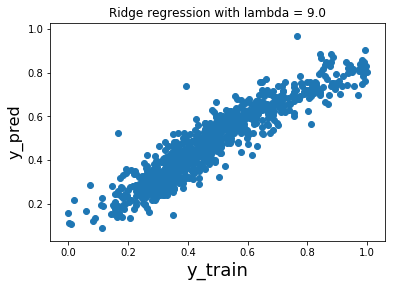

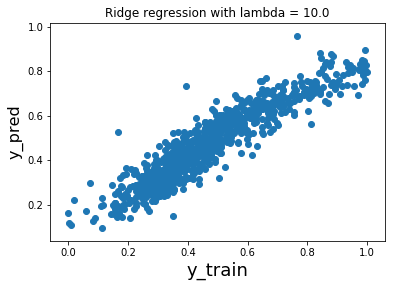

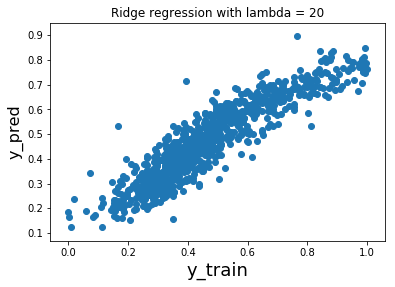

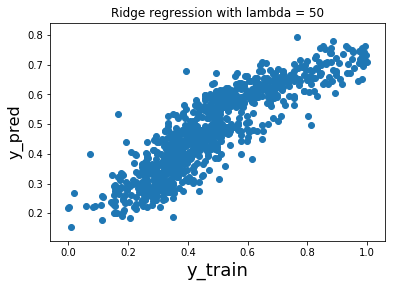

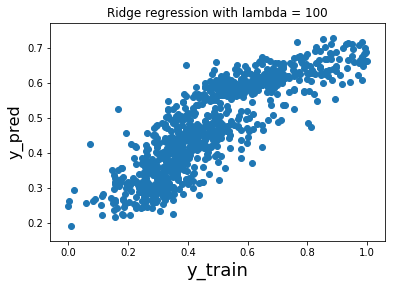

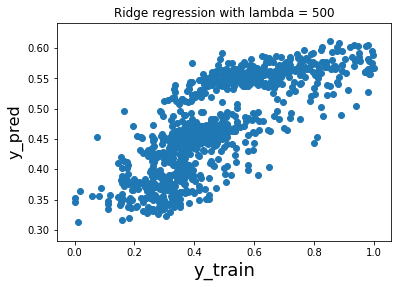

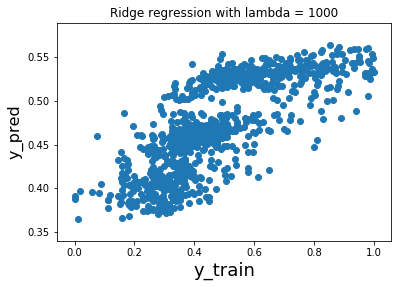

In [80]:
# plot the scatter plot for each lambda vaule

lambdas =  [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]

for i in lambdas: # for each lambda we get different model coefficients
    ridge = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridge.fit(X_train_rfe, y_train) # fit the model 
    
    #Plotting the ridge regression model for each lambda
    plt.figure()
    plt.scatter(y_train,ridge.predict(X_train_rfe)) 
    plt.title("Ridge regression with lambda = " + str(i))
    plt.xlabel('y_train', fontsize = 18)                          # X-label
    plt.ylabel('y_pred', fontsize = 16)
    plt.show()

In [81]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.2}


In [82]:
#Fitting Ridge model for alpha = 0.2 and printing coefficients which have been penalised

alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.07662175  0.08140273  0.2453478  -0.04484329  0.51842053  0.0701752
  0.18453189 -0.2418356  -0.03789822 -0.08206199 -0.04417548 -0.08120084
  0.18678388  0.10858177  0.13907746  0.12583647  0.08217609 -0.04898765
 -0.06176734 -0.04565544 -0.05570107 -0.05948072  0.0683179  -0.04291216
 -0.04592527  0.08769033 -0.08239667 -0.09297484 -0.06430529 -0.04788026
  0.04444996  0.07055159  0.09800451 -0.06431613 -0.05399394 -0.0999832
 -0.03213298 -0.09938003 -0.13516705 -0.10575671 -0.13503365  0.09675718
  0.07508497  0.11262046  0.09419259  0.08355123  0.03543182  0.03543182
  0.03543182  0.04115001]


In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

print('metrics for Ridge regresssion:-')

# init the metric list
metric2 = []

# r2_score for train set
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score for train set:", r2_train_lr)
metric2.append(r2_train_lr)

# r2_score for test set
r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score for test set:", r2_test_lr)
metric2.append(r2_test_lr)

# calculate RSS for train set
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train set:", rss1_lr)
metric2.append(rss1_lr)

# calculate RSS for test set
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for train set:", rss2_lr)
metric2.append(rss2_lr)

# calculate MSE for train set
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train set:", mse_train_lr)
metric2.append(mse_train_lr**0.5)

# calculate MSE for test set
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test set:", mse_test_lr)
metric2.append(mse_test_lr**0.5)

metrics for Ridge regresssion:-
r2_score for train set: 0.894705034684
r2_score for test set: 0.886662533401
RSS for train set: 3.76438649517086
RSS for train set: 0.9601478884432454
MSE for train set: 0.00402178044356
MSE for test set: 0.00410319610446


## Lasso regression

In [84]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

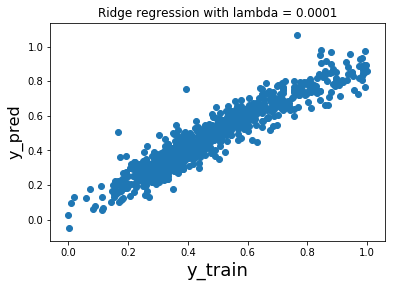

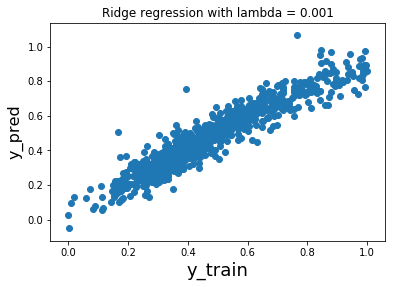

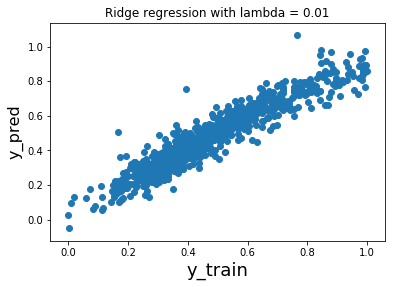

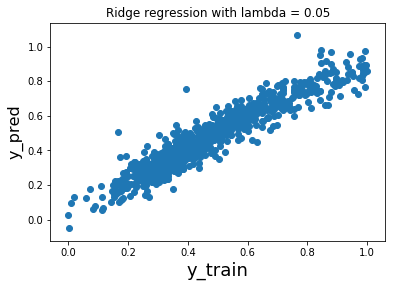

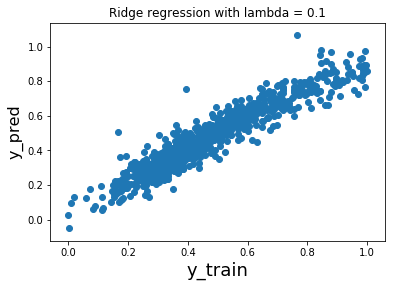

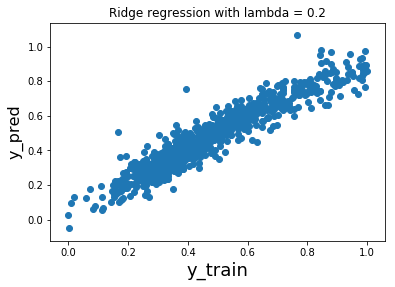

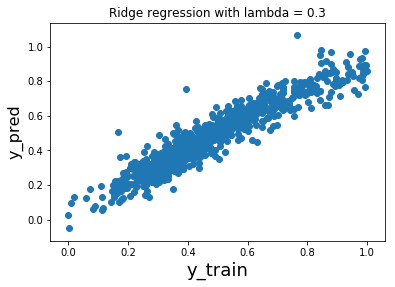

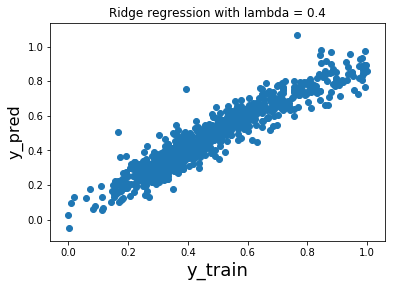

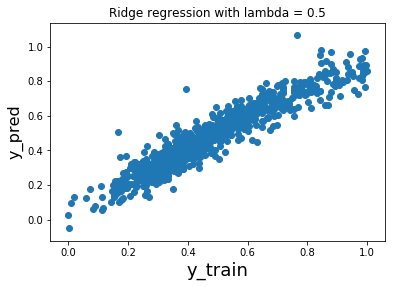

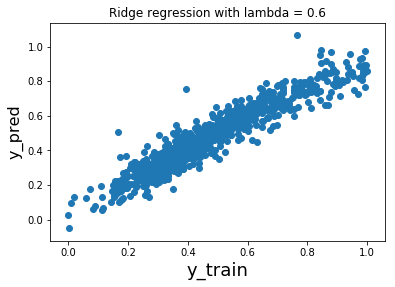

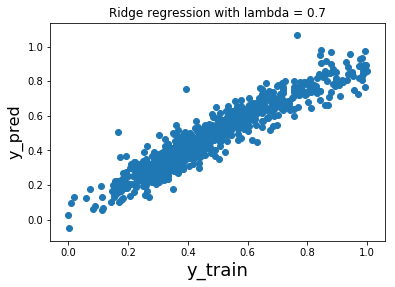

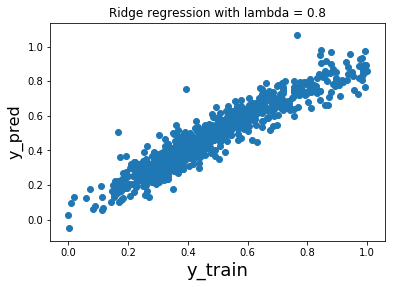

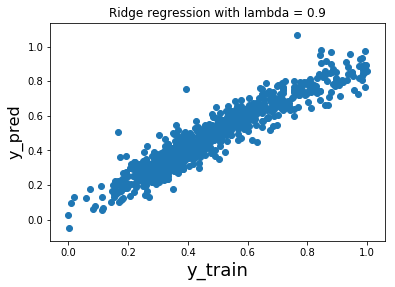

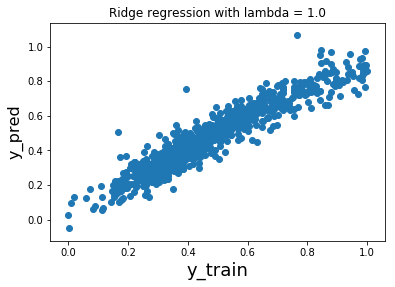

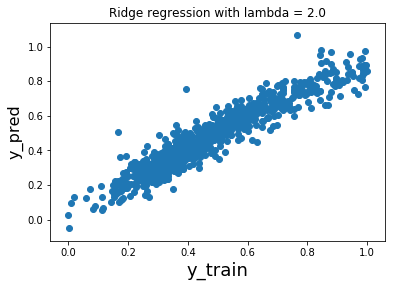

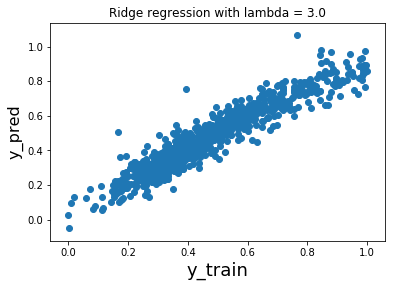

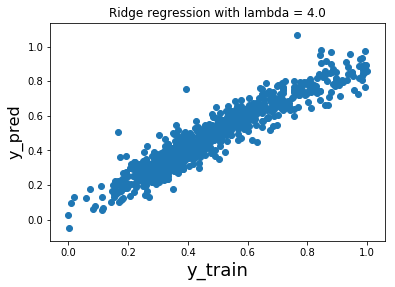

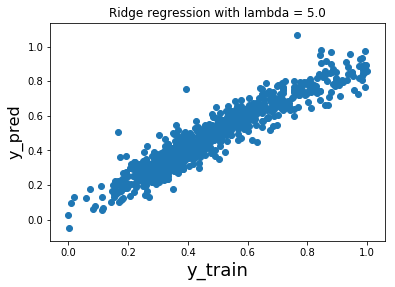

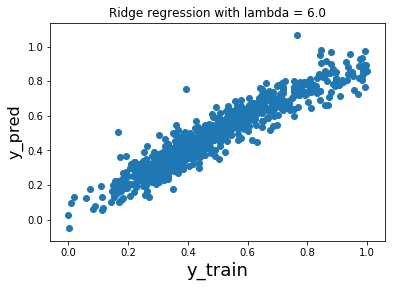

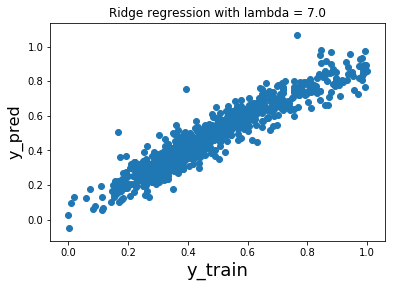

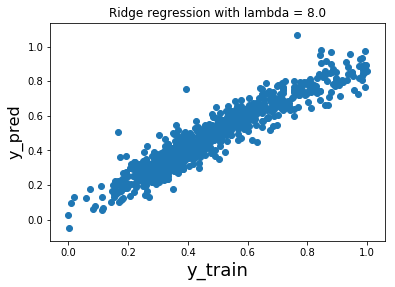

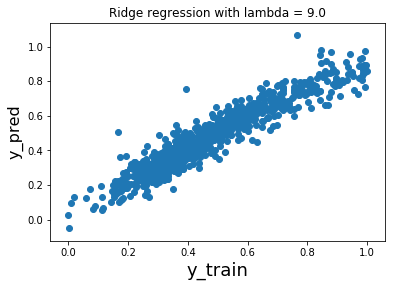

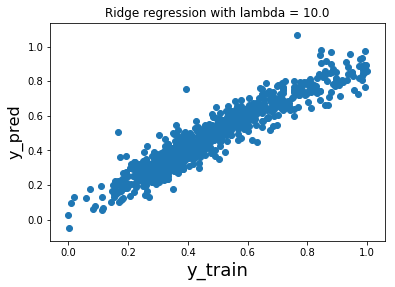

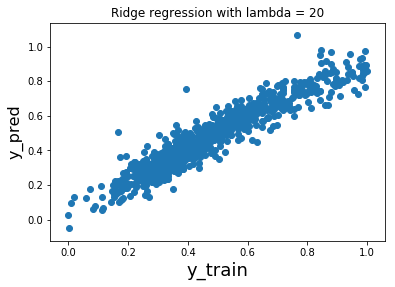

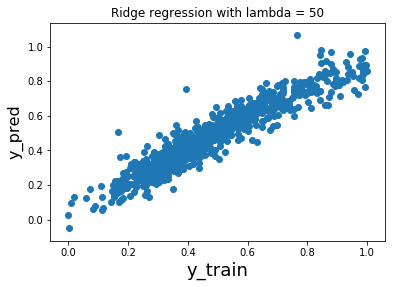

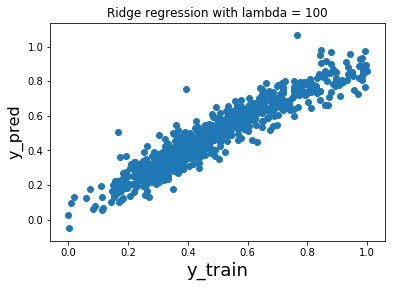

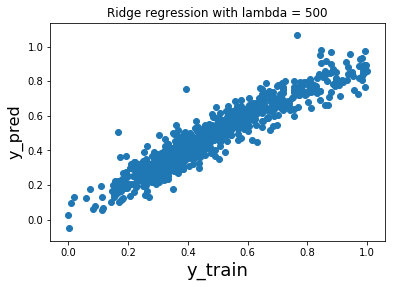

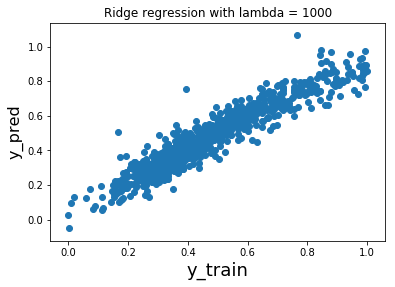

In [85]:
# plot the scatter plot for each lambda vaule

lambdas =  [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]

for i in lambdas: # for each lambda we get different model coefficients
    lasso = Lasso(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    lasso.fit(X_train_rfe, y_train) # fit the model 
    
    # Plotting the ridge regression model for each lambda
    plt.figure()
    plt.scatter(y_train,ridge.predict(X_train_rfe)) 
    plt.title("Ridge regression with lambda = " + str(i))
    plt.xlabel('y_train', fontsize = 18)                          # X-label
    plt.ylabel('y_pred', fontsize = 16)
    plt.show()

In [86]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [87]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
print(lasso.coef_)

[  7.07538804e-02   8.10393469e-02   2.14819192e-01  -1.16165531e-02
   5.16767061e-01   7.05532581e-02   1.71880145e-01  -2.51080469e-01
  -0.00000000e+00  -7.53238981e-02  -4.04068191e-02  -7.56562997e-02
   1.42051570e-01   6.23005276e-02   9.52074058e-02   7.86014895e-02
   8.32957979e-02  -4.27882485e-02  -4.84304750e-02  -4.29639083e-02
  -5.28421555e-02  -5.58890240e-02   6.83245059e-02  -3.57875027e-02
  -4.27199822e-02   7.94279473e-02  -7.33103871e-02  -7.44594573e-02
  -6.24920056e-02  -4.58147028e-02   4.45261939e-02   6.90208922e-02
   9.33737439e-02  -5.19275822e-02  -4.09761395e-02  -2.43489166e-02
  -0.00000000e+00  -1.81827139e-02  -1.30128022e-01  -9.77741376e-02
  -1.29647484e-01   1.55998193e-02  -2.58008881e-03   3.09014424e-02
   0.00000000e+00   3.01969345e-03   1.79996768e-02   2.19564186e-16
   0.00000000e+00   1.29909801e-02]


In [88]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

print('metrics for lasso regresssion:-')

# init the metric list
metric3 = []

# r2_score for train set
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score for train set:", r2_train_lr)
metric3.append(r2_train_lr)

#r2_score for test set
r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score for test set:", r2_test_lr)
metric3.append(r2_test_lr)

# calculate RSS for train set
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train set:", rss1_lr)
metric3.append(rss1_lr)

# calculate RSS for test set
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test set:", rss2_lr)
metric3.append(rss2_lr)

# calculate MSE for train set
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train set:", mse_train_lr)
metric3.append(mse_train_lr**0.5)

# calculate MSE for test set
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test set:", mse_test_lr)
metric3.append(mse_test_lr**0.5)

metrics for lasso regresssion:-
r2_score for train set: 0.891674641776
r2_score for test set: 0.890384702762
RSS for train set: 3.8727256745667
RSS for test set: 0.9286152173876693
MSE for train set: 0.00413752743009
MSE for test set: 0.00396844109995


In [89]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.894984,0.894705,0.891675
1,R2 Score (Test),0.884781,0.886663,0.890385
2,RSS (Train),3.754412,3.764386,3.872726
3,RSS (Test),0.976085,0.960148,0.928615
4,MSE (Train),0.063333,0.063418,0.064324
5,MSE (Test),0.064586,0.064056,0.062996


## Lets observe the changes in the coefficients after regularization

In [90]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [91]:
betas.rows = X_train_rfe.columns

In [92]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [93]:
# Set the display option with 4 decimal points
pd.set_option('display.float_format','{:.4f}'.format)
pd.set_option('display.max_rows', None)
betas.head(50)

,Linear,Ridge,Lasso
MasVnrArea,0.0737,0.0766,0.0708
BsmtFinSF1,0.0812,0.0814,0.0810
TotalBsmtSF,0.2664,0.2453,0.2148
1stFlrSF,-0.0682,-0.0448,-0.0116
GrLivArea,0.5313,0.5184,0.5168
Fireplaces,0.0681,0.0702,0.0706
GarageArea,0.1877,0.1845,0.1719
PropertyAge,-0.2413,-0.2418,-0.2511
MSSubClass_40,-0.0466,-0.0379,-0.0000
MSSubClass_90,-0.0849,-0.0821,-0.0753


In [94]:
# sort value beata values as returned by Lasso

betas.sort_values(by=['Lasso'], ascending=False)

,Linear,Ridge,Lasso
GrLivArea,0.5313,0.5184,0.5168
TotalBsmtSF,0.2664,0.2453,0.2148
GarageArea,0.1877,0.1845,0.1719
MSZoning_FV,0.2044,0.1868,0.1421
MSZoning_RL,0.1563,0.1391,0.0952
OverallCond_9,0.0997,0.0980,0.0934
Neighborhood_Crawfor,0.0823,0.0822,0.0833
BsmtFinSF1,0.0812,0.0814,0.0810
Neighborhood_StoneBr,0.0887,0.0877,0.0794
MSZoning_RM,0.1447,0.1258,0.0786


In [95]:
# no of variables with zero beta coefficients as determined by Lasso
betas[betas.Lasso == 0]

,Linear,Ridge,Lasso
MSSubClass_40,-0.0466,-0.0379,-0.0000
Foundation_Wood,-0.0392,-0.0321,-0.0000
GarageType_CarPort,0.1404,0.0942,0.0000
GarageCond_NoGar,0.0483,0.0354,0.0000


# Setp9. Final conclusion: -
### - After comparing with r2_score of all three models linear, ridge and lasso I can confirm that Lasso Regression model is best considering the gap between r2_score on train and test data is least and Lasso also eliminates the features (it eliminated 4 features). 
 
### - The above dataframe provides how well the these 46 variables predict the house SalePrice. 

### - The optimal value of lambda for `Ridge is 0.5` and for `Lasso is 0.0001`.

### Following are top 20 variables in predicting SalePrice of house 

1.  GrLivArea            ->  0.5168 
2.  PropertyAge          -> -0.2511 
3.  TotalBsmtSF          ->  0.2148 
4.  GarageArea           ->  0.1719 
5.  MSZoning_FV          ->  0.1421 
6.  KitchenQual_Fa       -> -0.1301 
7.  KitchenQual_TA       -> -0.1296 
8.  KitchenQual_Gd       -> -0.0978 
9.  MSZoning_RL          ->  0.0952 
10. OverallCond_9        ->  0.0934 
11. Neighborhood_Crawfor ->  0.0833 
12. BsmtFinSF1           ->  0.0810 
13. Neighborhood_StoneBr ->  0.0794 
14. MSZoning_RM          ->  0.0786 
15. MSSubClass_160       -> -0.0757 
16. MSSubClass_90        -> -0.0753 
17. HouseStyle_2.5Fin    -> -0.0745 
18. Condition1_RRAe      -> -0.0733 
19. MasVnrArea           ->  0.0708 
20. Fireplaces           ->  0.0706 

#### Comment about variable that best describe Sale Price
#### SalePrice is best described by these variables. 
- SalePrice highly dependent on `Above ground living area square feet` i.e. higher the above ground living area higher the price.
- SalePrice is highly (negatively) related to `Property Age`. i.e. Older the property lower is the Sale price.
- Toatl `basement area and Garage Area` (both in square feet) also have positive impact on Sale Price. Higher the both area higher the price.
- Sale Price is also increases for `MS Zoning FV (Floating Village Residential), RL (Residential Low Density), RM (Residential Medium Density)` i.e. Sale price for property in these zones increases.
- Sale Price is negatively related to `Kitchen Quality FA (Fair), TA (Avergae) and GD(good)`. So Price reduces if Kitchen quality is Good, Fair or Avergae
- Sale price is higher when `overall condition is 9 and Neighborhood is Crawfor and StoneBr`.
- Sale price of dwelling type `2-STORY PUD - 1946 & NEWER` and `DUPLEX - ALL STYLES AND AGES` tend to be higher.
- Sale pric eis high when the `HouseStyle is Two and one-half story: 2nd level finished`
- propert `Adjacent to East-West Railroad` tends to have lower sale price
- Sale Price increase with number of `Fireplaces'

# Part II - For Question answer

### Question 1 - Double to alpha value for both Ridge and Lasso

### Ridge 
Optimal alpha previouly was 0.2. 
Let's take double i.e. 0.4 and build model

In [96]:
#Fitting Ridge model for alpha = 0.2 and printing coefficients which have been penalised
alpha = 0.4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.07867371  0.08134483  0.2295446  -0.02681541  0.5068449   0.07174691
  0.18269602 -0.24089463 -0.03200071 -0.07913248 -0.04455747 -0.0794362
  0.1730968   0.09482547  0.12577221  0.1111382   0.08194818 -0.04854281
 -0.05995687 -0.04620238 -0.05650149 -0.05930414  0.06881554 -0.0419364
 -0.04675826  0.08642275 -0.07963385 -0.08480544 -0.0643747  -0.04766434
  0.04415678  0.06955268  0.09617619 -0.0629127  -0.05250899 -0.08719285
 -0.02669473 -0.08487787 -0.1335917  -0.10305319 -0.13350736  0.07742015
  0.0505868   0.09451535  0.06836247  0.06342803  0.02819946  0.02819946
  0.02819946  0.03692264]


In [97]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

print('metrics for Ridge regresssion:-')

# init the metric list
metric2 = []

# r2_score for train set
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score for train set:", r2_train_lr)
metric2.append(r2_train_lr)

# r2_score for test set
r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score for test set:", r2_test_lr)
metric2.append(r2_test_lr)

# calculate RSS for train set
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train set:", rss1_lr)
metric2.append(rss1_lr)

# calculate RSS for test set
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for train set:", rss2_lr)
metric2.append(rss2_lr)

# calculate MSE for train set
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train set:", mse_train_lr)
metric2.append(mse_train_lr**0.5)

# calculate MSE for test set
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test set:", mse_test_lr)
metric2.append(mse_test_lr**0.5)

metrics for Ridge regresssion:-
r2_score for train set: 0.894163345242
r2_score for test set: 0.887609792882
RSS for train set: 3.7837523633520025
RSS for train set: 0.9521231000087864
MSE for train set: 0.00404247047367
MSE for test set: 0.00406890213679


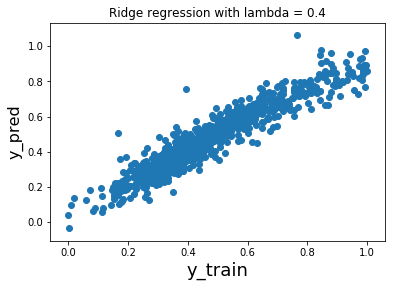

In [98]:
plt.figure()
plt.scatter(y_train,y_pred_train) 
plt.title("Ridge regression with lambda = " + str(0.4))
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

### Lasso 
Optimal alpha previouly was 0.0001. 
Let's take double i.e. 0.0002 and build model

In [99]:
#Fitting Ridge model for alpha = 0.0002 and printing coefficients which have been penalised

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

print(lasso.coef_)

[  6.40152682e-02   7.87304181e-02   2.02838576e-01  -0.00000000e+00
   5.13513050e-01   7.05590324e-02   1.64833259e-01  -2.52981289e-01
  -0.00000000e+00  -6.78927935e-02  -3.55867394e-02  -6.77169565e-02
   8.63735545e-02   2.98979484e-03   4.26822195e-02   2.26152309e-02
   8.38560876e-02  -3.67400370e-02  -3.34725604e-02  -3.68187138e-02
  -4.93180393e-02  -5.09840682e-02   6.71913157e-02  -2.89934891e-02
  -3.94967491e-02   6.87154897e-02  -6.06107916e-02  -5.01774505e-02
  -6.08996829e-02  -4.63391507e-02   4.36963319e-02   6.57397006e-02
   8.56293626e-02  -3.72048289e-02  -2.57329695e-02  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -1.24093870e-01  -8.97687509e-02
  -1.25503833e-01   1.23673446e-02  -5.99699396e-03   2.72160993e-02
   0.00000000e+00  -0.00000000e+00   7.60788682e-03   2.20411924e-17
   4.52127024e-18   0.00000000e+00]


In [100]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

print('metrics for lasso regresssion:-')

# init the metric list
metric3 = []

# r2_score for train set
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score for train set:", r2_train_lr)
metric3.append(r2_train_lr)

#r2_score for test set
r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score for test set:", r2_test_lr)
metric3.append(r2_test_lr)

# calculate RSS for train set
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train set:", rss1_lr)
metric3.append(rss1_lr)

# calculate RSS for test set
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test set:", rss2_lr)
metric3.append(rss2_lr)

# calculate MSE for train set
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train set:", mse_train_lr)
metric3.append(mse_train_lr**0.5)

# calculate MSE for test set
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test set:", mse_test_lr)
metric3.append(mse_test_lr**0.5)

metrics for lasso regresssion:-
r2_score for train set: 0.887836728631
r2_score for test set: 0.891669906485
RSS for train set: 4.009934404068164
RSS for test set: 0.9177275058671849
MSE for train set: 0.00428411795306
MSE for test set: 0.00392191241824


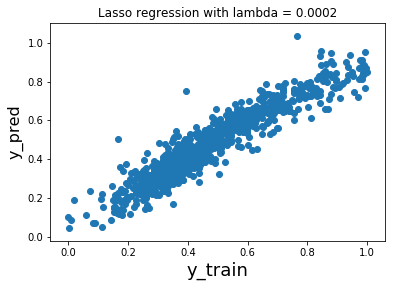

In [101]:
plt.figure()
plt.scatter(y_train,y_pred_train) 
plt.title("Lasso regression with lambda = " + str(0.0002))
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [102]:
# Create dataframe having all the beta coefficient values

betas_new = pd.DataFrame(index=X_train_rfe.columns)
betas_new.rows = X_train_rfe.columns

# beta coefficient for Ridge and Lasso
betas_new['Ridge'] = ridge.coef_
betas_new['Lasso'] = lasso.coef_

# Set the display option with 4 decimal points
pd.set_option('display.float_format','{:.4f}'.format)
pd.set_option('display.max_rows', None)

# sort by Lasso value
betas_new.sort_values(by=['Lasso'], ascending=False)

,Ridge,Lasso
GrLivArea,0.5068,0.5135
TotalBsmtSF,0.2295,0.2028
GarageArea,0.1827,0.1648
MSZoning_FV,0.1731,0.0864
OverallCond_9,0.0962,0.0856
Neighborhood_Crawfor,0.0819,0.0839
BsmtFinSF1,0.0813,0.0787
Fireplaces,0.0717,0.0706
Neighborhood_StoneBr,0.0864,0.0687
Neighborhood_NridgHt,0.0688,0.0672


In [103]:
# no of variables with zero beta coefficients as determined by Lasso

betas_new[betas_new.Lasso == 0]

,Ridge,Lasso
1stFlrSF,-0.0268,-0.0000
MSSubClass_40,-0.0320,-0.0000
ExterCond_Po,-0.0872,-0.0000
Foundation_Wood,-0.0267,-0.0000
BsmtCond_Po,-0.0849,-0.0000
GarageType_CarPort,0.0684,0.0000
GarageType_Detchd,0.0634,-0.0000
SaleCondition_Alloca,0.0369,0.0000


### Question 3 - Double to alpha value for both Ridge and Lasso

### Create another model using Lasso regression after eliminating 5 important predictor variables as determined above.
- the five important predictor variables as determined above are:
    - 1.GrLivArea -> 0.5168 
    - 2.PropertyAge -> -0.2511 
    - 3.TotalBsmtSF -> 0.2148 
    - 4.GarageArea -> 0.1719 
    - 5.MSZoning_FV -> 0.1421 

lets create a new X_train and X_test and build model again.

In [104]:
# drop the top 5 features identified above to create new X_train

X_train_new = X_train_rfe.drop(['GrLivArea', 'PropertyAge', 'TotalBsmtSF', 'GarageArea', 'MSZoning_FV'], axis=1)

In [105]:
# Find out the best alpha 

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [106]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [107]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)

[ 0.24469375  0.07449697  0.41071448  0.11471651 -0.00550288  0.01329989
 -0.09340759 -0.04471954 -0.0548032  -0.03458457 -0.09613081  0.03463947
 -0.08944014 -0.01067561 -0.06136761 -0.12295645 -0.06750821  0.08042321
 -0.05617338 -0.10834408  0.08705453 -0.0401097   0.04885942 -0.09256564
 -0.0556383   0.01711503  0.02250391  0.05226638 -0.05986514 -0.05313154
 -0.08858812  0.07691557 -0.09998012 -0.23260676 -0.10588378 -0.19993903
  0.11198135 -0.0085687   0.21269787 -0.          0.04583714 -0.         -0.
 -0.         -0.        ]


In [108]:
# Create dataframe having all the beta coefficient values

betas_new = pd.DataFrame(index=X_train_new.columns)
betas_new.rows = X_train_new.columns

betas_new['Lasso'] = lasso.coef_

# Set the display option with 4 decimal points
pd.set_option('display.float_format','{:.4f}'.format)
pd.set_option('display.max_rows', None)

# sort by Lasso value
betas_new.sort_values(by=['Lasso'], ascending=False)

,Lasso
1stFlrSF,0.4107
MasVnrArea,0.2447
GarageType_BuiltIn,0.2127
Fireplaces,0.1147
GarageType_Attchd,0.1120
Neighborhood_StoneBr,0.0871
Neighborhood_NridgHt,0.0804
Foundation_Wood,0.0769
BsmtFinSF1,0.0745
OverallCond_9,0.0523
